<a href="https://colab.research.google.com/github/DataScience-Challenge-Group1/Data-Science-Challenge-Hackathon/blob/main/hackathon__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Data Science Challenge 2025 — Group 1**
### *Module:* 7PAM2015 — Research Methods  
### *Instructor:*   Dr Pedro Carrilho  
### *Date:* 22 October 2025  

---

##  **Team Name:** **XAI Explorers**  
###  *Explaining intelligence through data and collaboration*  




# **👥 Team Members**
- **Riffat Munaf** — 22076284  
- **Eman Abdul Wahid** — 23013083  
- **Rabia Akhtar** — 23031641  
- **Hamza Tariq** — 23010525  
- **Anandhu Shaji** — 23006426  
- **Umar Sattar** — 23035824  
- **Arsalan Saleem** — 23034246  
- **Burhan Muhammad** — 22033349  
- **Naqash Razzaq** — 23033626  


###  **GitHub Repository**
🔗 [Data-Science-Challenge-Hackathon](https://github.com/DataScience-Challenge-Group1/Data-Science-Challenge-Hackathon)


# **1.  Project Overview**
This notebook documents the full workflow for our Data Science Challenge hackathon:
- Perform data exploration (EDA)
- Pre-process features
- Build and tune multiple models
- Evaluate performance with relevant metrics
- Apply Explainable AI (XAI) techniques
- Submit top-5 model results


# **2. Setup and Imports**

In [ ]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing




In [ ]:
# Mount your GoogleDrive (only need to do once)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Data Loading**

In [ ]:
# Load the data
df_train = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset_A_training.csv")
df_test  = pd.read_csv("/content/drive/MyDrive/Hackathon/dataset_A_testing.csv")

# Quick sanity checks
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Train columns:", list(df_train.columns)[:12], "...")

Train shape: (4756, 31)
Test shape: (4749, 30)
Train columns: ['respondent_id', 'flu_concern', 'flu_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition'] ...


In [ ]:
# Cell 2 — Domain knowledge & non-graphical analysis (head/info/describe, balance, missing)

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

assert TARGET in df_train.columns
assert ID_COL in df_train.columns and ID_COL in df_test.columns

print("== Train.head(10) ==")
display(df_train.head(10))

print("\n== Train.info() ==")
df_train.info()

print("\n== Numeric describe (train) ==")
display(df_train.select_dtypes(include=["number"]).describe().T)

print("\n== Categorical describe (train) ==")
display(df_train.select_dtypes(exclude=["number"]).describe().T)

print("\n== Target distribution (train) ==")
tgt_counts = df_train[TARGET].value_counts(dropna=False).sort_index()
tgt_ratio  = (tgt_counts / len(df_train)).rename("ratio")
display(pd.concat([tgt_counts.rename("count"), tgt_ratio], axis=1))

print("\n== Missing values (train) — top 15 ==")
miss_train = df_train.isna().sum().sort_values(ascending=False)
display(miss_train[miss_train > 0].head(15))

print("\n== Missing values (test) — top 15 ==")
miss_test = df_test.isna().sum().sort_values(ascending=False)
display(miss_test[miss_test > 0].head(15))


== Train.head(10) ==


,respondent_id,flu_concern,flu_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_sector,seasonal_vaccine
0,1,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,Non-MSA,0.0,0.0,entertainment,0
1,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,real_estate,0
2,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,NaN,0
3,4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,utilities,1
4,5,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",2.0,0.0,NaN,0
5,6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Female,"> $75,000",Married,Rent,Employed,Non-MSA,2.0,2.0,administrative,0
6,7,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,0.0,technology,1
7,8,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",NaN,NaN,NaN,0
8,9,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",3.0,0.0,NaN,1
9,10,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,NaN,0



== Train.info() ==
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                4756 non-null   int64  
 1   flu_concern                  4744 non-null   float64
 2   flu_knowledge                4733 non-null   float64
 3   behavioral_antiviral_meds    4742 non-null   float64
 4   behavioral_avoidance         4724 non-null   float64
 5   behavioral_face_mask         4753 non-null   float64
 6   behavioral_wash_hands        4748 non-null   float64
 7   behavioral_large_gatherings  4747 non-null   float64
 8   behavioral_outside_home      4747 non-null   float64
 9   behavioral_touch_face        4737 non-null   float64
 10  doctor_recc_seasonal         4435 non-null   float64
 11  chronic_med_condition        4568 non-null   float64
 12  child_under_6_months         4604 non-null   float64
 13

,count,mean,std,min,25%,50%,75%,max
respondent_id,4756.0,2378.500000,1373.083270,1.0,1189.75,2378.5,3567.25,4756.0
flu_concern,4744.0,1.643128,0.919810,0.0,1.00,2.0,2.00,3.0
flu_knowledge,4733.0,1.293049,0.618902,0.0,1.00,1.0,2.00,2.0
behavioral_antiviral_meds,4742.0,0.052299,0.222652,0.0,0.00,0.0,0.00,1.0
behavioral_avoidance,4724.0,0.734124,0.441846,0.0,0.00,1.0,1.00,1.0
behavioral_face_mask,4753.0,0.073848,0.261551,0.0,0.00,0.0,0.00,1.0
behavioral_wash_hands,4748.0,0.836563,0.369803,0.0,1.00,1.0,1.00,1.0
behavioral_large_gatherings,4747.0,0.365494,0.481619,0.0,0.00,0.0,1.00,1.0
behavioral_outside_home,4747.0,0.336634,0.472608,0.0,0.00,0.0,1.00,1.0
behavioral_touch_face,4737.0,0.688410,0.463192,0.0,0.00,1.0,1.00,1.0



== Categorical describe (train) ==


,count,unique,top,freq
age_group,4756,5,65+ Years,1169
education,4486,4,College Graduate,1879
race,4756,4,White,3766
sex,4756,2,Female,2783
income_poverty,3966,3,"<= $75,000, Above Poverty",2258
marital_status,4491,2,Married,2403
rent_or_own,4375,2,Own,3292
employment_status,4487,3,Employed,2467
census_msa,4756,3,"MSA, Not Principle City",2059
employment_sector,2442,21,media,511



== Target distribution (train) ==


,count,ratio
seasonal_vaccine,,
0,2205,0.463625
1,2551,0.536375



== Missing values (train) — top 15 ==


,0
employment_sector,2314
health_insurance,1925
income_poverty,790
rent_or_own,381
doctor_recc_seasonal,321
education,270
employment_status,269
marital_status,265
chronic_med_condition,188
child_under_6_months,152



== Missing values (test) — top 15 ==


,0
employment_sector,2405
health_insurance,1982
income_poverty,797
rent_or_own,379
doctor_recc_seasonal,345
employment_status,277
education,269
marital_status,269
chronic_med_condition,168
child_under_6_months,155


# **4. Exploratory Data Analysis (EDA)**

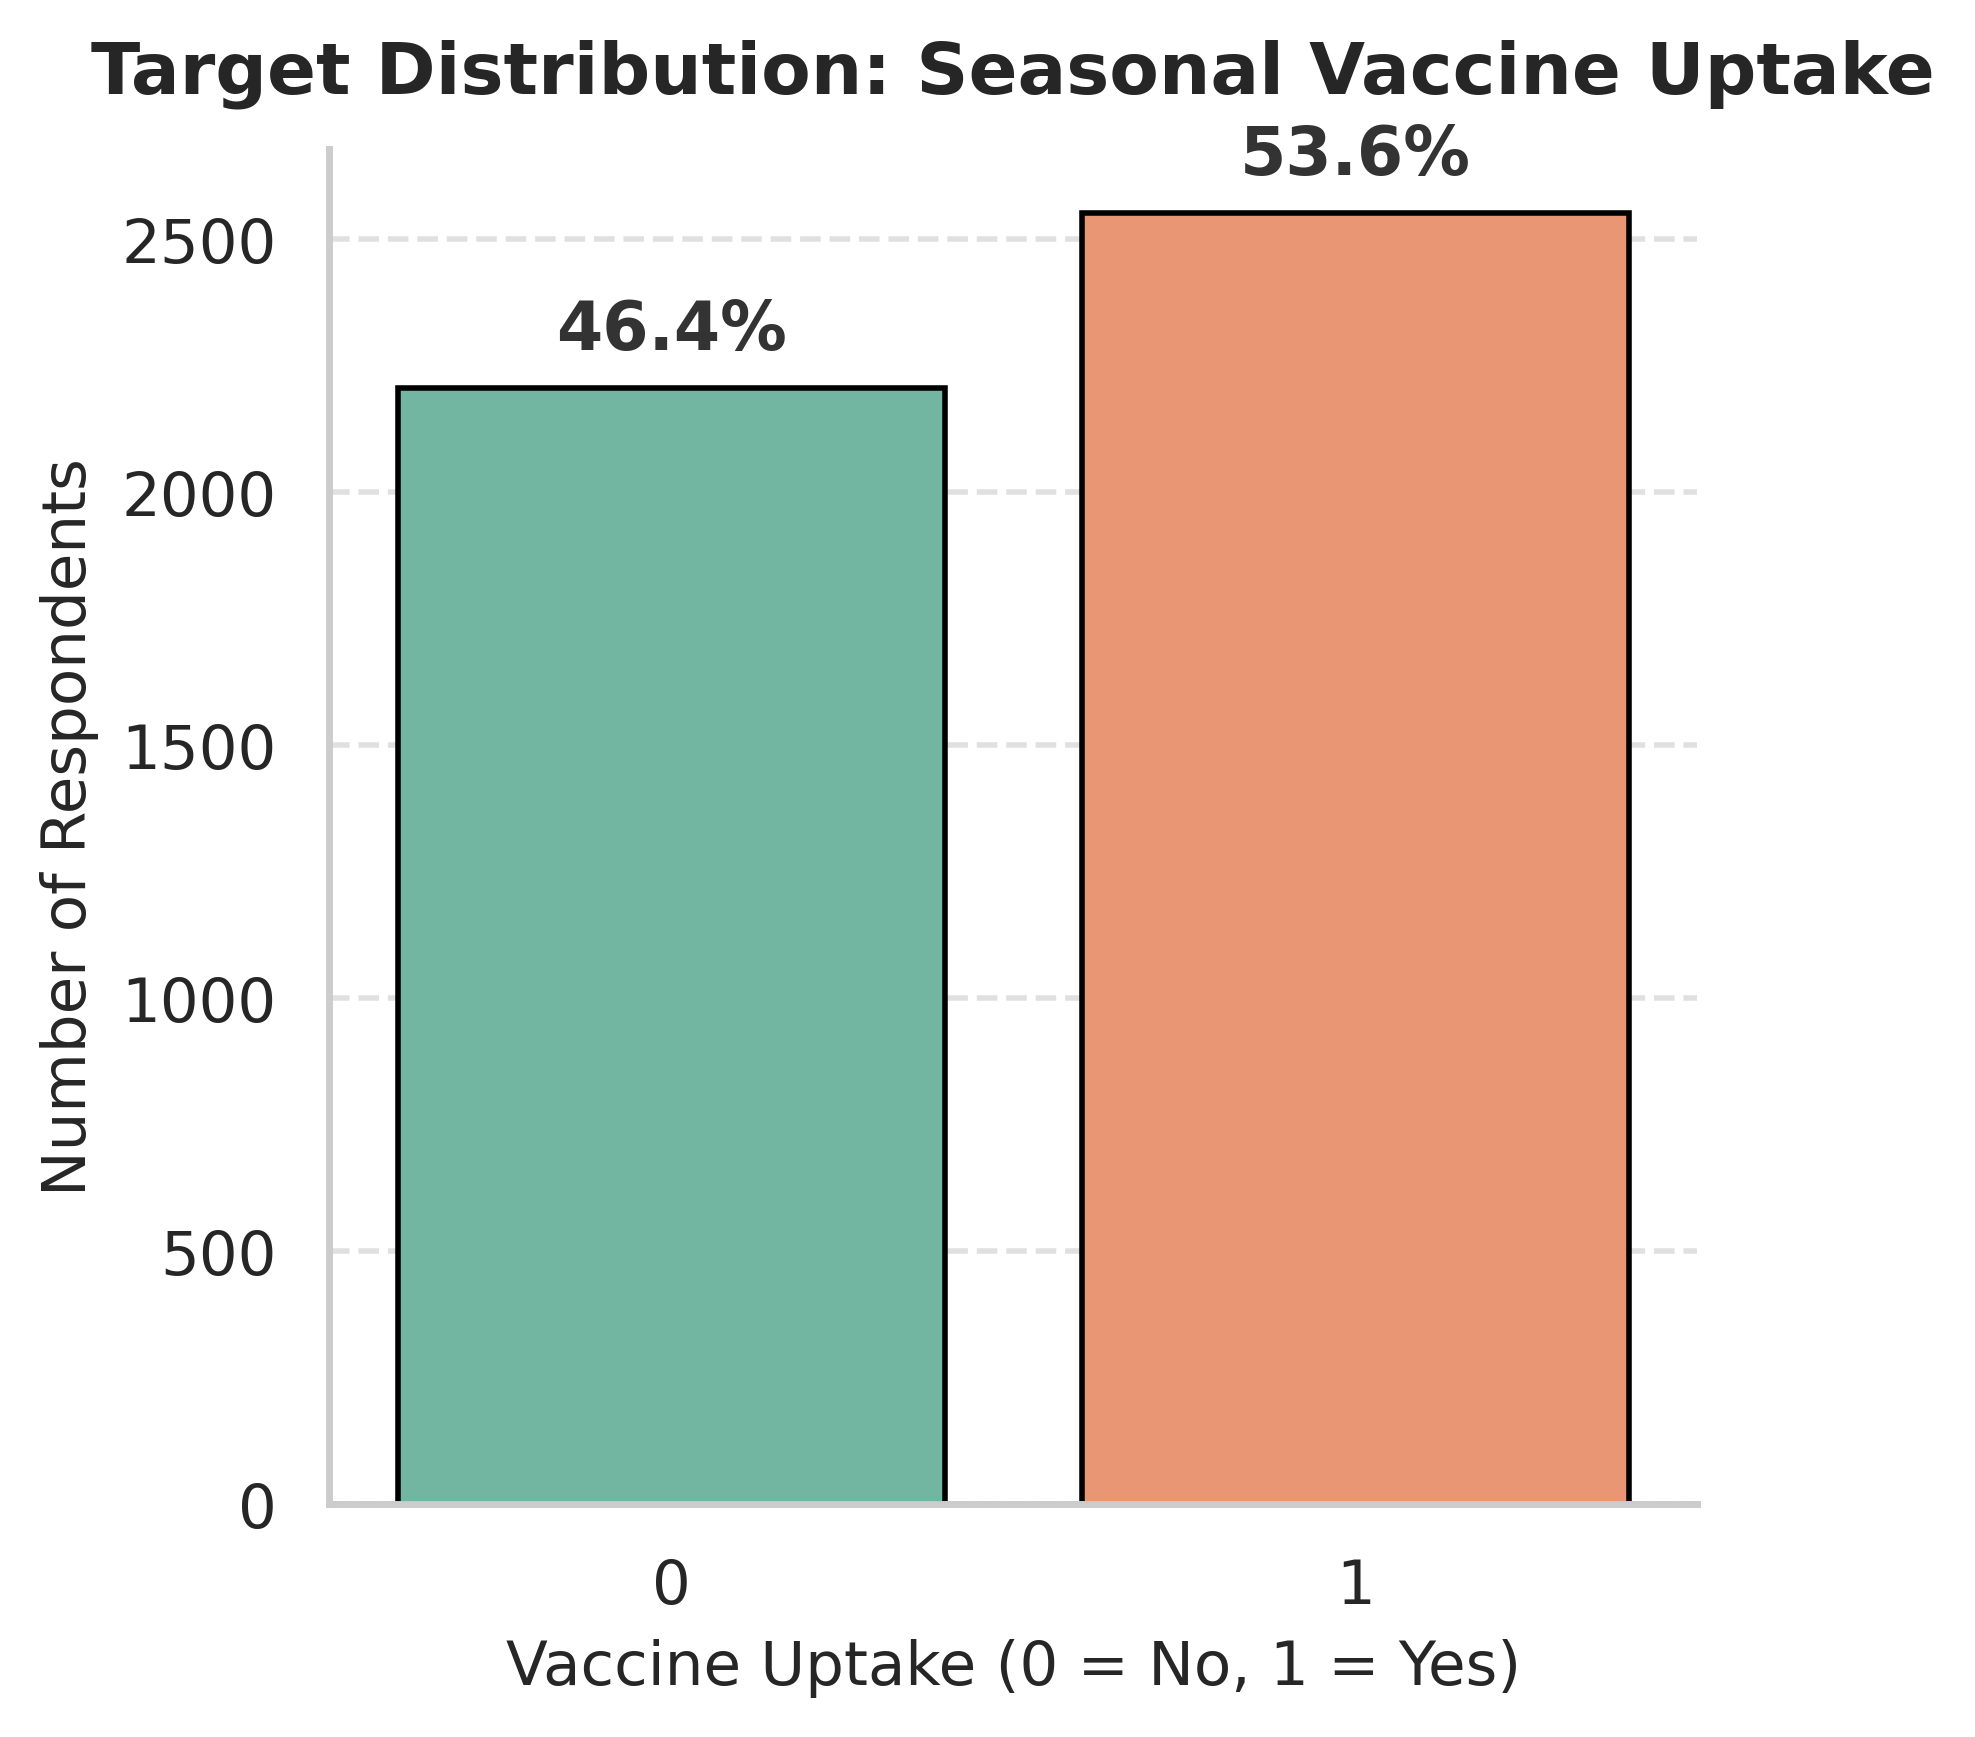

In [ ]:
# 🥇 Target Distribution (Seaborn 0.14+ compatible)
# -------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare target distribution data
tgt_df = (
    df_train[TARGET]
    .value_counts()
    .sort_index()
    .rename_axis("Vaccine Uptake")
    .reset_index(name="Count")
)
tgt_df["Percentage"] = tgt_df["Count"] / tgt_df["Count"].sum() * 100

# Plot (fixed version)
plt.figure(figsize=(4.5, 4.5), dpi=200)
ax = sns.barplot(
    data=tgt_df,
    x="Vaccine Uptake",
    y="Count",
    hue="Vaccine Uptake",                 # ✅ fixes warning
    palette=["#66c2a5", "#fc8d62"],
    dodge=False,
    legend=False,                         # hide duplicate legend
    edgecolor="black"
)

# Annotate correct percentages
for i, p in enumerate(ax.patches):
    height = p.get_height()
    perc = tgt_df.loc[i, "Percentage"]
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 50,
        f"{perc:.1f}%",
        ha="center", va="bottom",
        fontsize=12, fontweight="bold", color="#333333"
    )

# Styling for presentation
ax.set_title("Target Distribution: Seasonal Vaccine Uptake",
             fontsize=13, fontweight="bold", pad=10)
ax.set_xlabel("Vaccine Uptake (0 = No, 1 = Yes)", fontsize=11)
ax.set_ylabel("Number of Respondents", fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.6)
sns.despine()

plt.tight_layout()
plt.show()


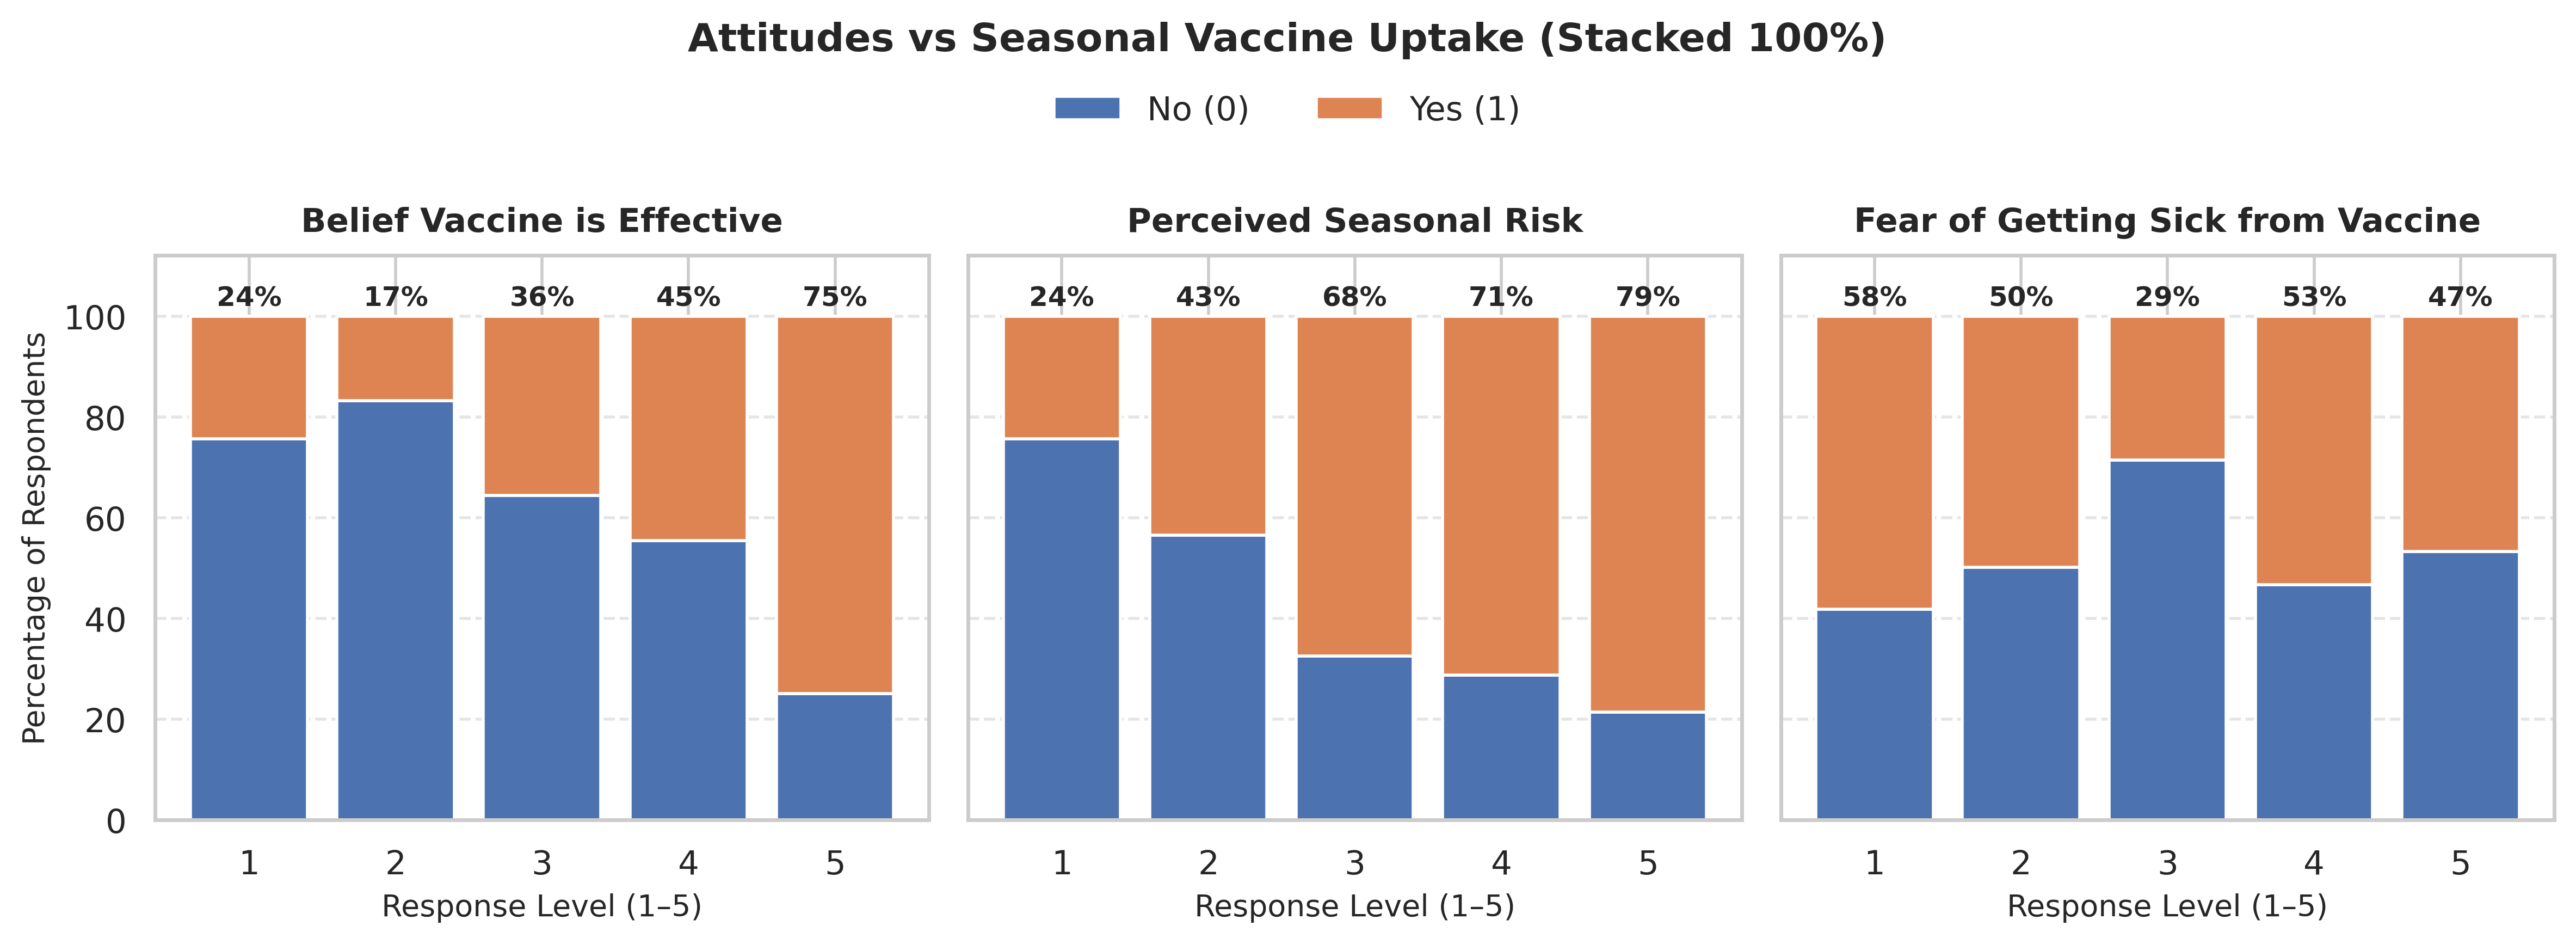

In [ ]:
# 2️⃣ Attitude vs Uptake — Stacked 100% bars (one row of three)
# -------------------------------------------------------------
# Shows how vaccine uptake changes across Likert levels (1–5)
# for the three opinion features. Perfect for the EDA slide.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OPINION_FEATS = [
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc"
]

TITLES = {
    "opinion_seas_vacc_effective": "Belief Vaccine is Effective",
    "opinion_seas_risk": "Perceived Seasonal Risk",
    "opinion_seas_sick_from_vacc": "Fear of Getting Sick from Vaccine"
}

levels = pd.CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

def stacked_pct_table(df, feature, target):
    tmp = df[[feature, target]].dropna().copy()
    # coerce to numeric (some files load as floats already)
    tmp[feature] = pd.to_numeric(tmp[feature], errors="coerce")
    tmp = tmp.dropna(subset=[feature])
    tmp[feature] = tmp[feature].astype(int).astype(levels)

    ct = pd.crosstab(tmp[feature], tmp[target], normalize="index") * 100.0
    # ensure both columns 0 and 1 exist
    for c in [0, 1]:
        if c not in ct.columns:
            ct[c] = 0.0
    ct = ct[[0, 1]]  # order: No, Yes
    return ct

# Build the three tables
tables = [stacked_pct_table(df_train, f, TARGET) for f in OPINION_FEATS]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=200, sharey=True)
for ax, f, ct in zip(axes, OPINION_FEATS, tables):
    # Stacked bars (0 = No, 1 = Yes)
    ax.bar(ct.index.astype(str), ct[0], label="No (0)")
    ax.bar(ct.index.astype(str), ct[1], bottom=ct[0], label="Yes (1)")

    # Annotate % Yes on top of each stack
    for i, lvl in enumerate(ct.index):
        yes = ct.loc[lvl, 1]
        ax.text(i, 100 + 1, f"{yes:.0f}%", ha="center", va="bottom", fontsize=9, fontweight="bold")

    ax.set_title(TITLES[f], fontsize=11, fontweight="bold", pad=8)
    ax.set_xlabel("Response Level (1–5)", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.set_ylim(0, 112)  # room for labels above 100%
    if ax is axes[0]:
        ax.set_ylabel("Percentage of Respondents", fontsize=10)

# Single legend for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False, bbox_to_anchor=(0.5, 1.03))

plt.suptitle("Attitudes vs Seasonal Vaccine Uptake (Stacked 100%)", fontsize=13, fontweight="bold", y=1.08)
plt.tight_layout()
plt.show()

# Optional: save high-res PNG for slides
# fig.savefig("/content/Attitudes_vs_Uptake.png", dpi=300, bbox_inches="tight")


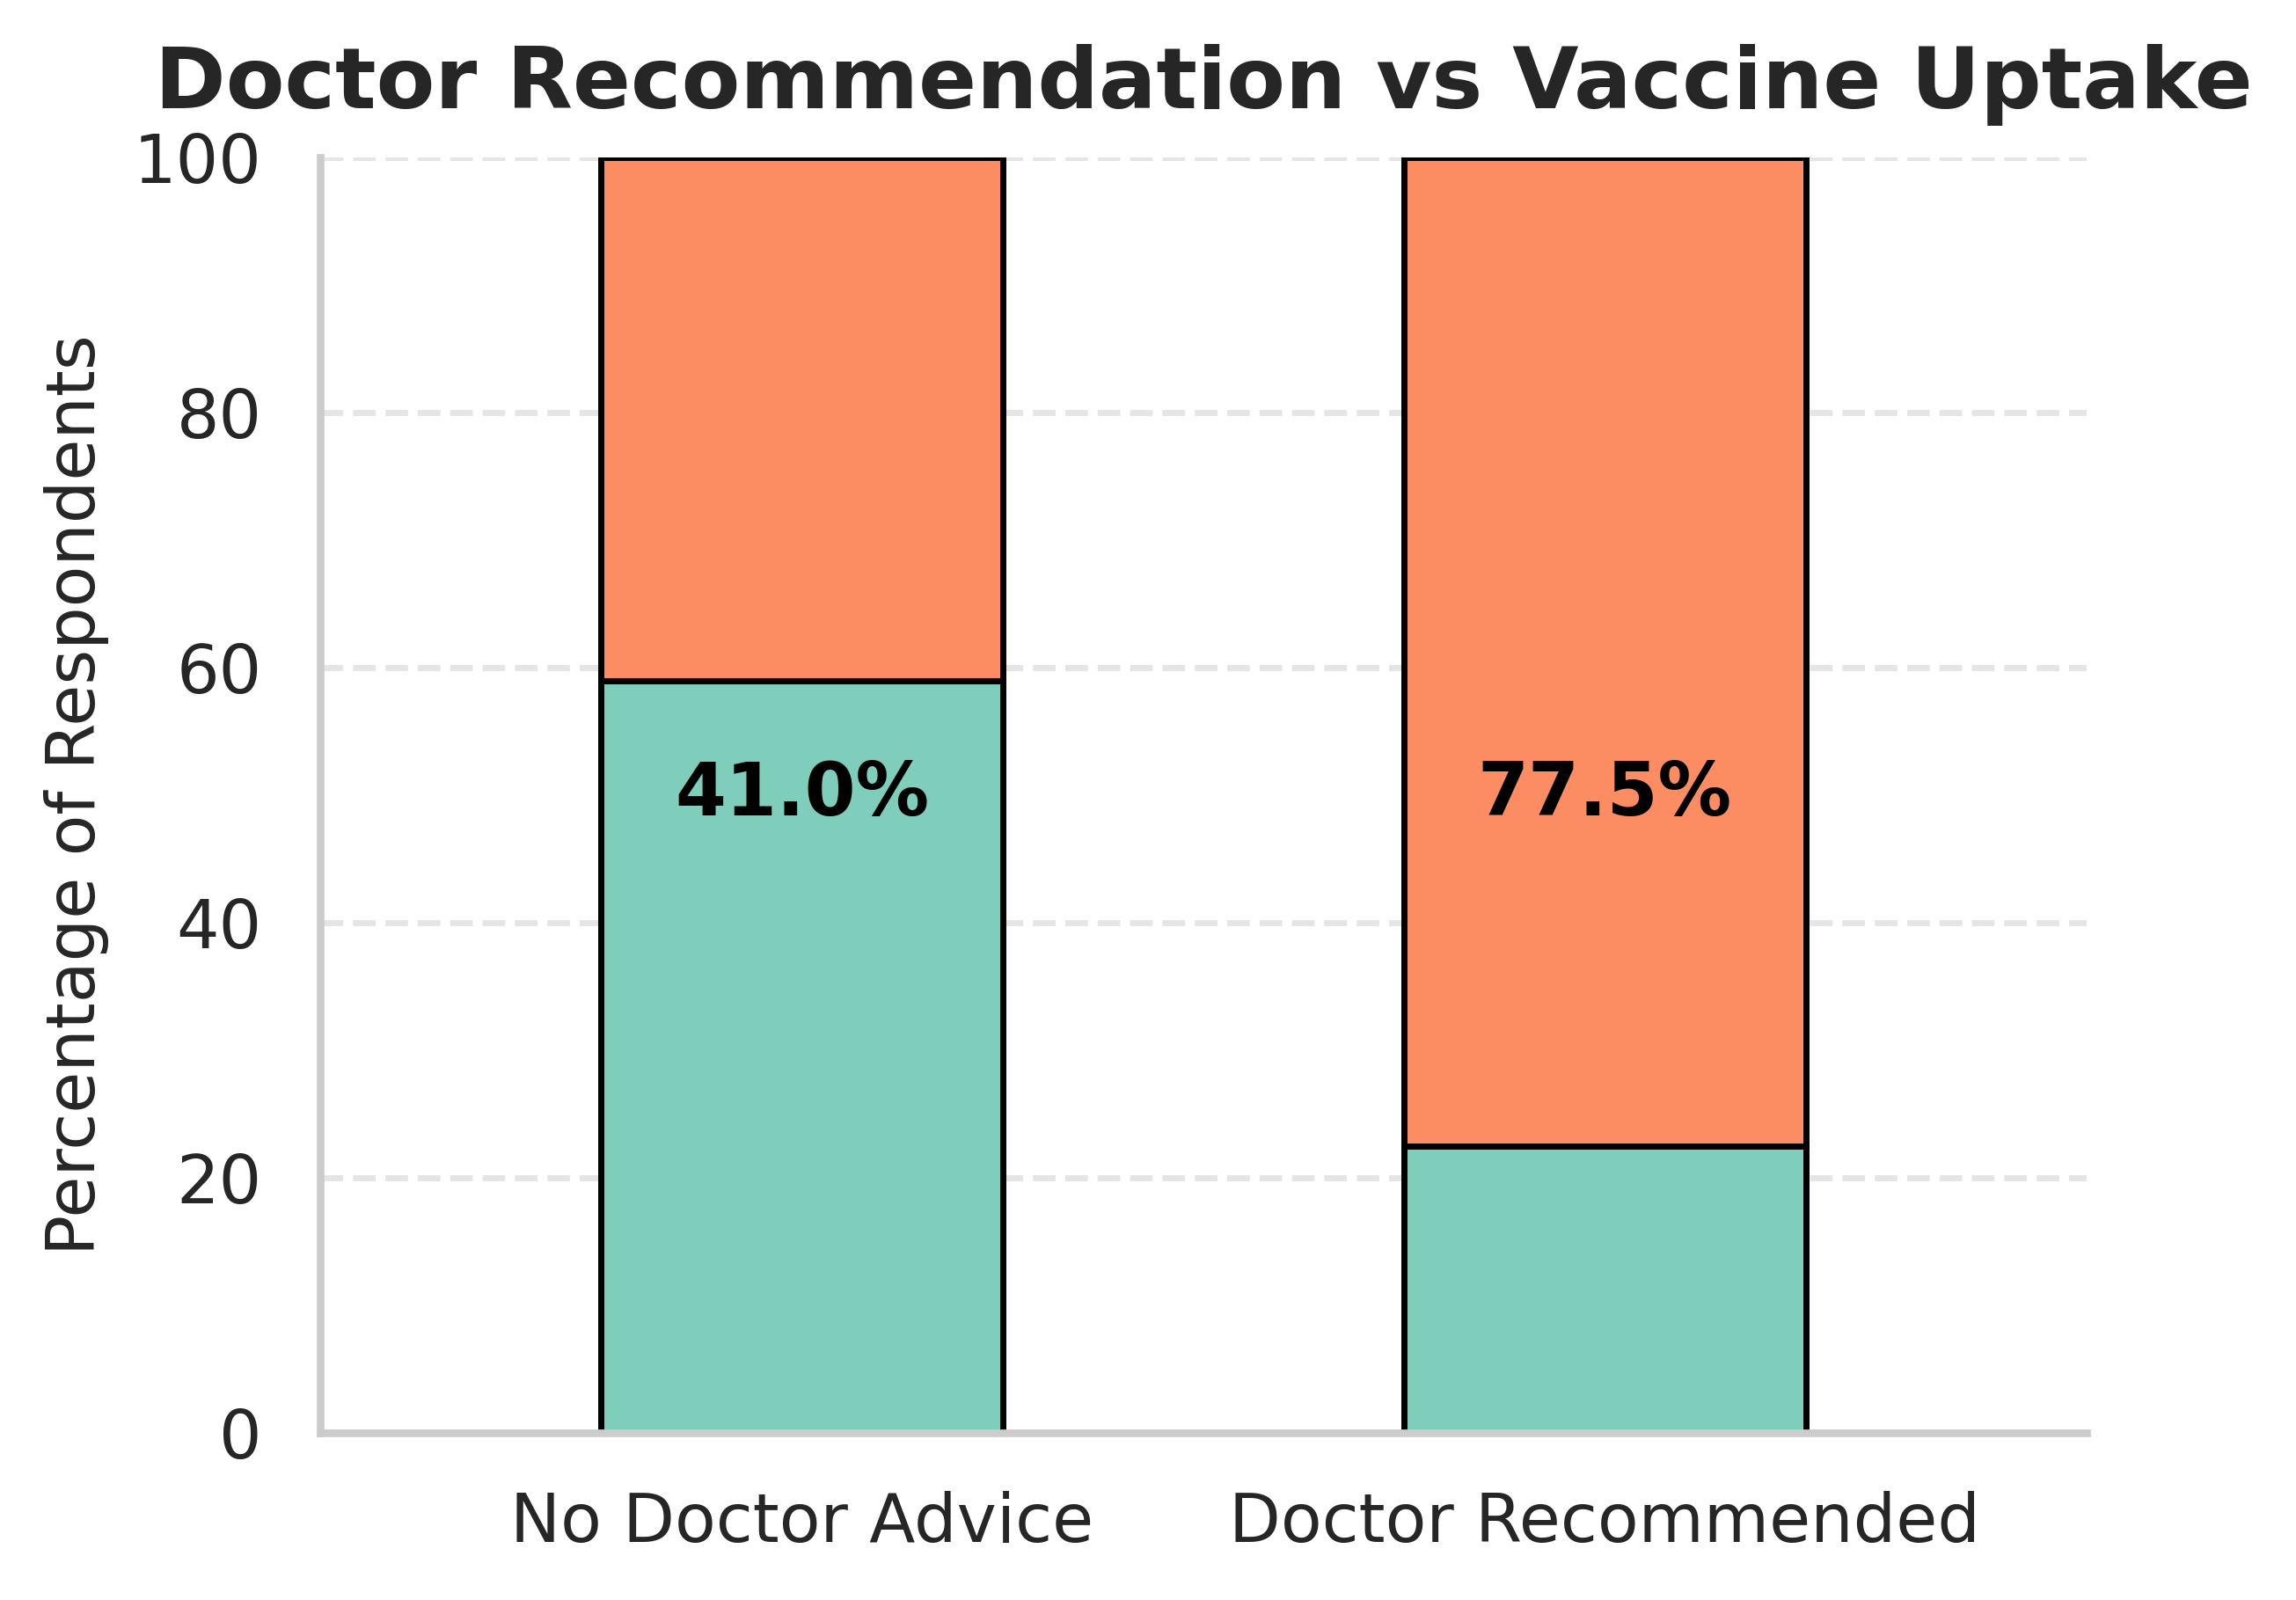

In [ ]:
# 🥉 Doctor Recommendation vs Vaccine Uptake — Final Polished Version
# -------------------------------------------------------------------
# Elegant proportions, balanced spacing, centered annotations, high DPI.

import matplotlib.pyplot as plt
import seaborn as sns

feature = "doctor_recc_seasonal"
tmp = df_train[[feature, TARGET]].dropna()

# Compute 100% stacked proportions
summary = (
    tmp.groupby(feature)[TARGET]
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)[[0, 1]].rename(columns={0: "No", 1: "Yes"})

# Create figure
fig, ax = plt.subplots(figsize=(5, 3.8), dpi=250)

# Draw stacked bars manually (so it looks more compact)
x = [0, 1]
ax.bar(x, summary["No"], color="#7fcdbb", width=0.5, edgecolor="black")
ax.bar(x, summary["Yes"], bottom=summary["No"], color="#fc8d62", width=0.5, edgecolor="black")

# Annotate Yes % inside bars
for i, (no, yes) in enumerate(zip(summary["No"], summary["Yes"])):
    ax.text(i, 50, f"{yes:.1f}%", ha="center", va="center", fontsize=12, fontweight="bold", color="black")

# Custom axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(["No Doctor Advice", "Doctor Recommended"], fontsize=11)
ax.set_ylabel("Percentage of Respondents", fontsize=11)
ax.set_title("Doctor Recommendation vs Vaccine Uptake", fontsize=14, fontweight="bold", pad=8)

# Style
ax.set_ylim(0, 100)
ax.set_xlim(-0.6, 1.6)
ax.grid(axis="y", linestyle="--", alpha=0.5)
sns.despine()
plt.tight_layout()

plt.show()


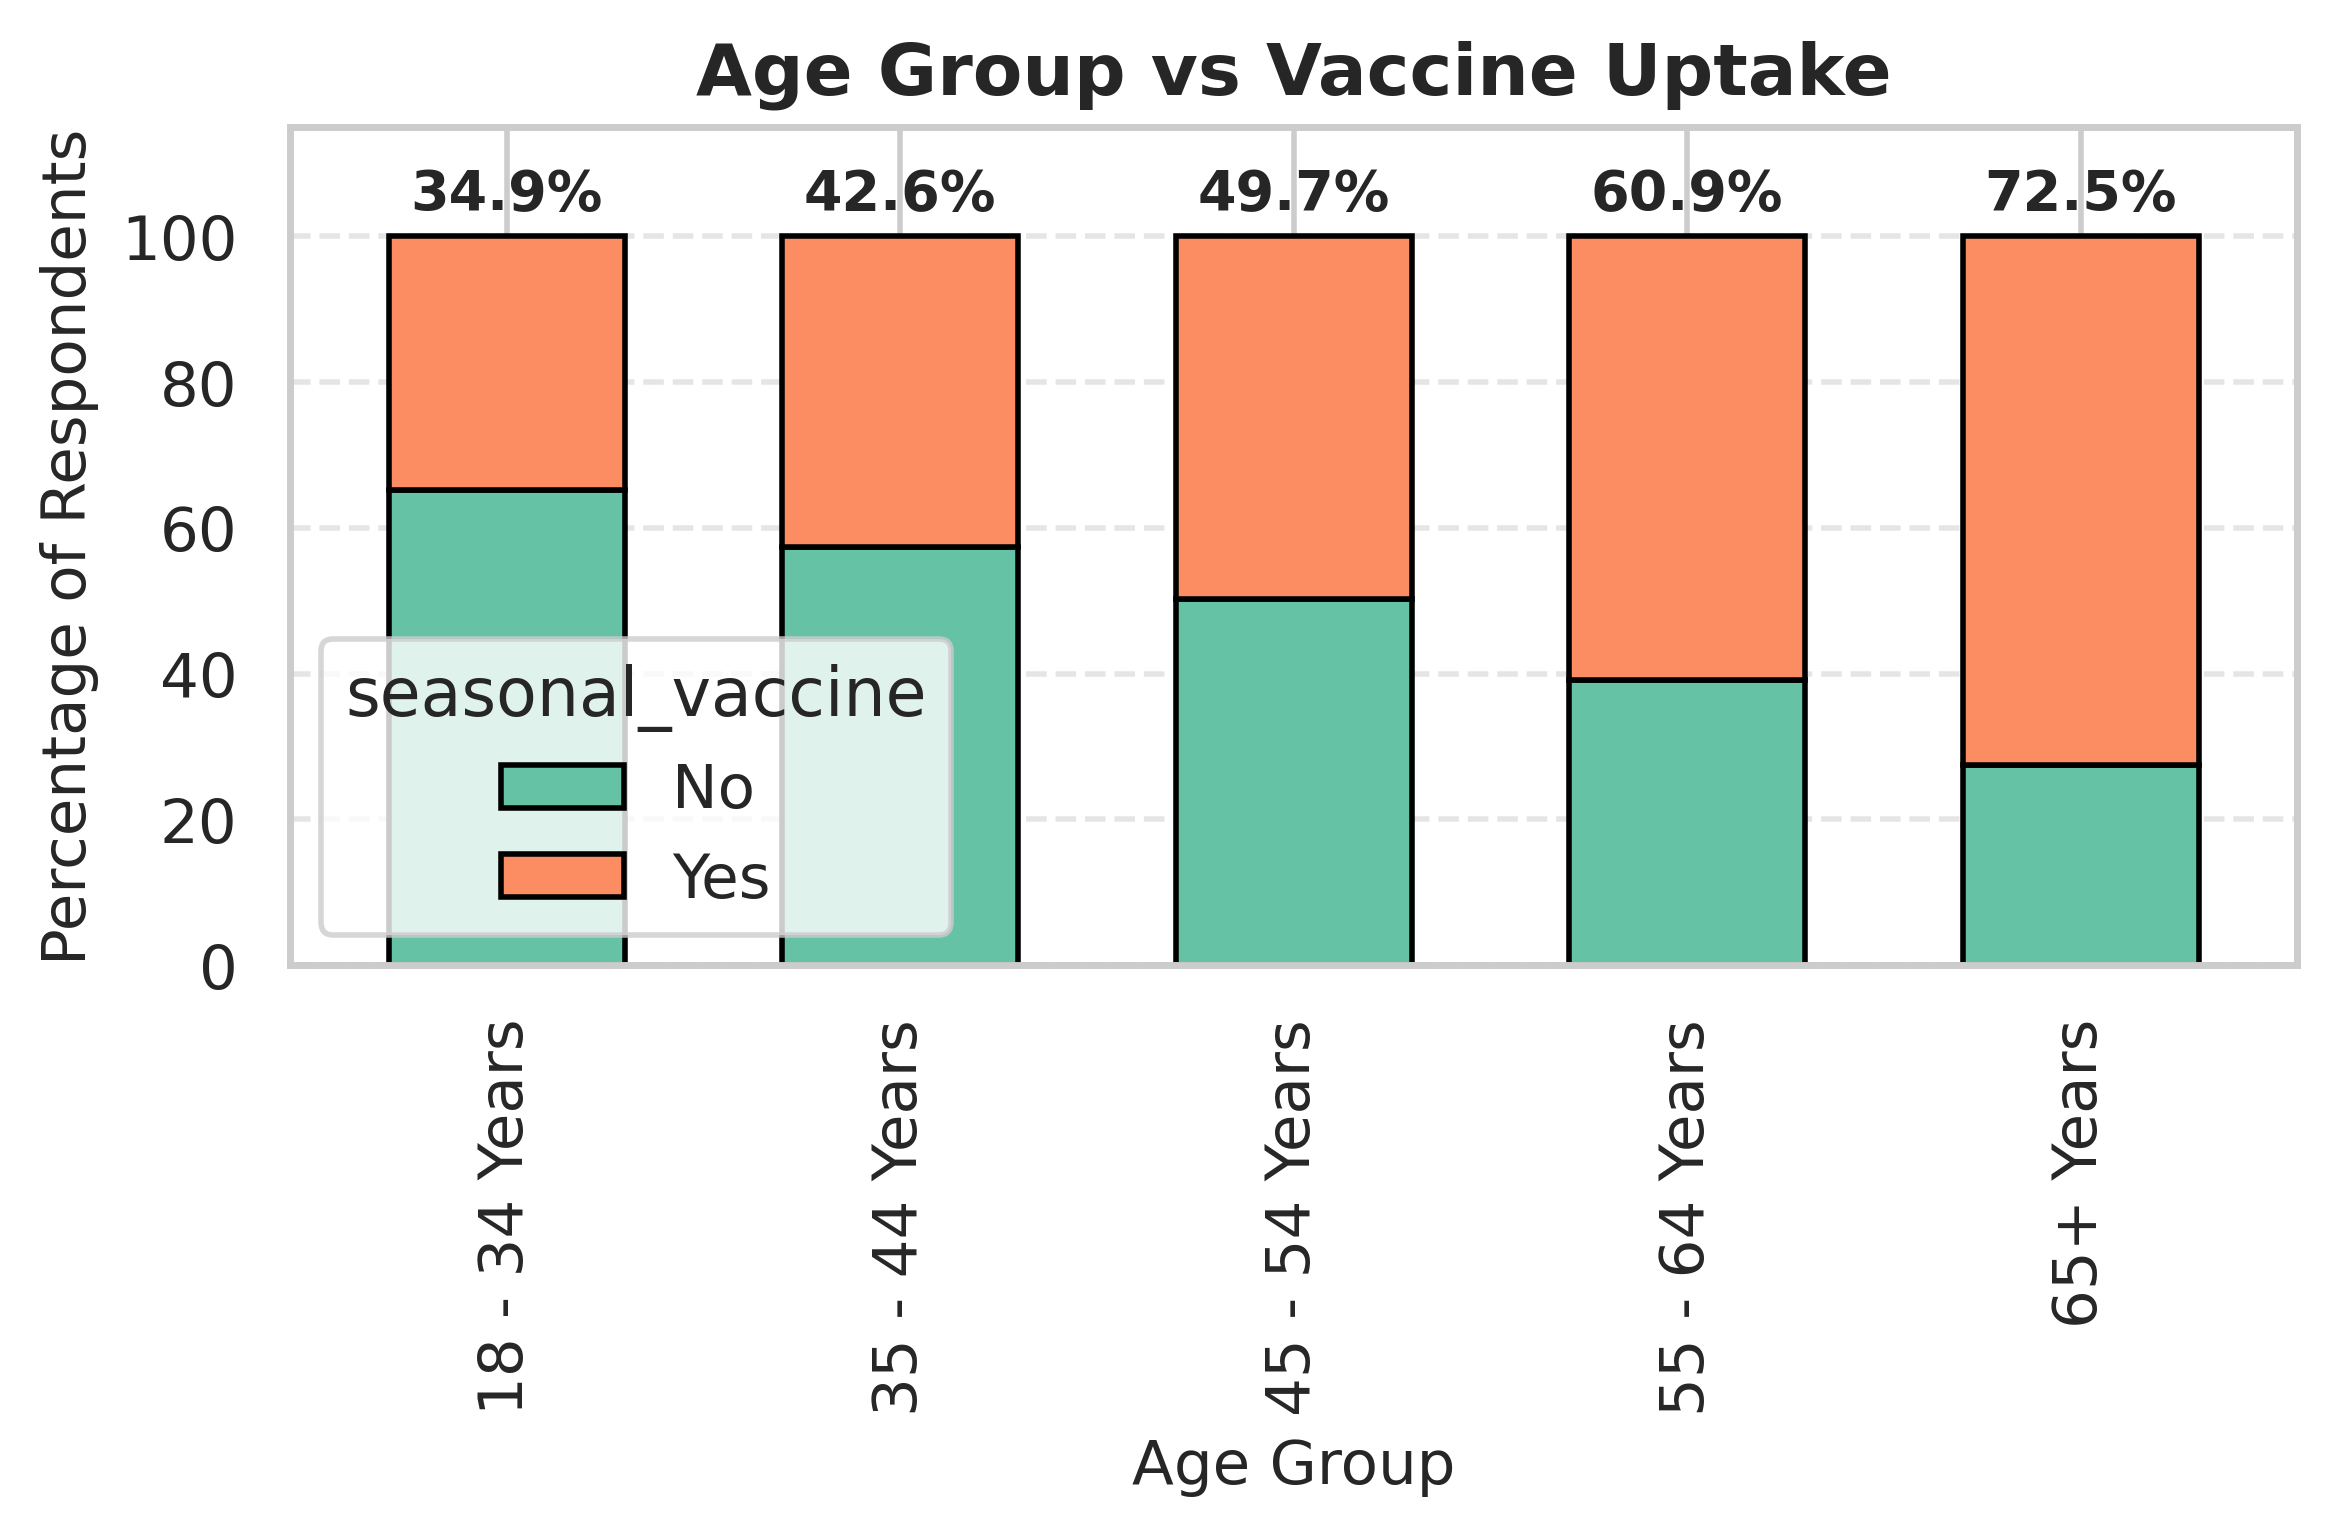

In [ ]:
# 🏅 4️⃣ Age Group vs Vaccine Uptake
# ----------------------------------
# Displays how uptake varies across age groups.

import matplotlib.pyplot as plt
import seaborn as sns

feature = "age_group"
tmp = df_train[[feature, TARGET]].dropna()
order = ["18 - 34 Years", "35 - 44 Years", "45 - 54 Years", "55 - 64 Years", "65+ Years"]

# Compute percentage uptake by age group
summary = (
    tmp.groupby(feature)[TARGET]
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)[[0, 1]].rename(columns={0: "No", 1: "Yes"}).reindex(order)

# Plot stacked bar
plt.figure(figsize=(6, 4), dpi=200) # Moved dpi here
ax = summary.plot(
    kind="bar",
    stacked=True,
    color=["#66c2a5", "#fc8d62"],
    edgecolor="black",
    width=0.6,
    ax=plt.gca() # Use current axes
)

# Annotate Yes % above bars
for i, perc in enumerate(summary["Yes"]):
    plt.text(i, 102, f"{perc:.1f}%", ha="center", va="bottom", fontsize=10, weight="bold")

plt.title("Age Group vs Vaccine Uptake", fontsize=13, weight="bold")
plt.xlabel("Age Group", fontsize=11)
plt.ylabel("Percentage of Respondents", fontsize=11)
plt.ylim(0, 115)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show() # Added plt.show()

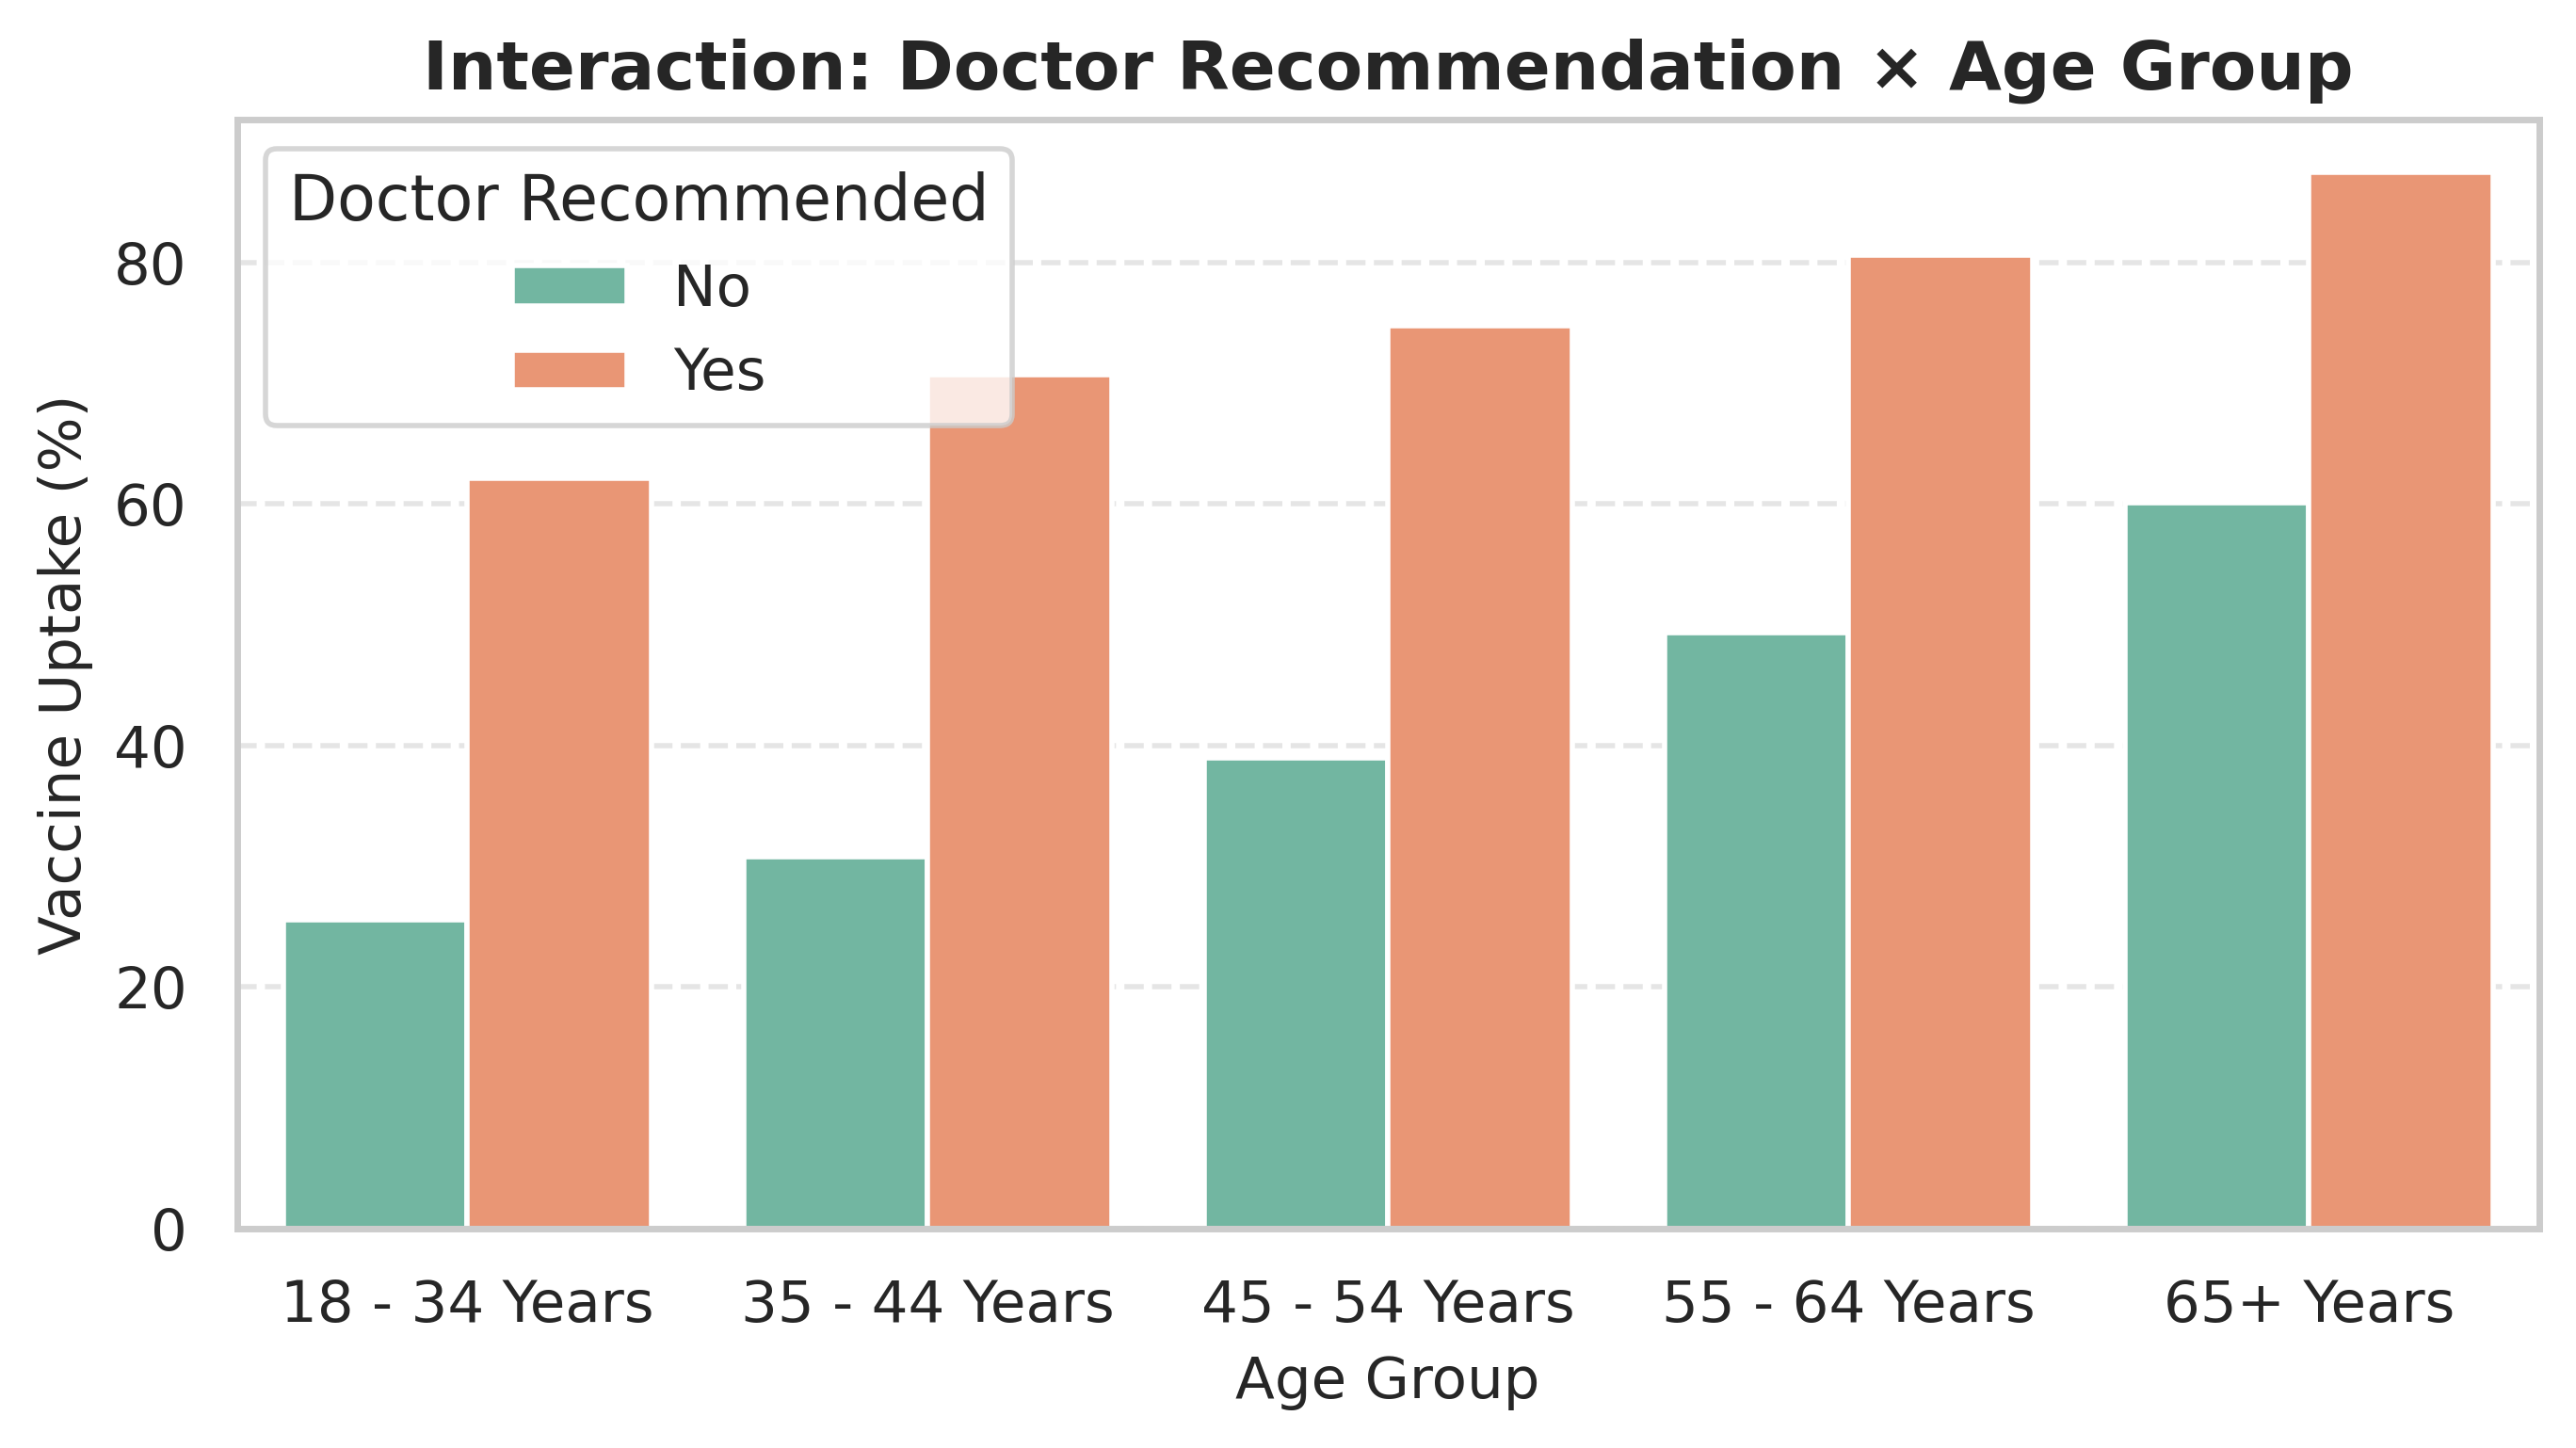

In [ ]:
# 🎯 5️⃣ Interaction: Doctor Recommendation × Age Group
# -----------------------------------------------------
# Combines behavioral (doctor advice) and demographic (age) effects.

feature1 = "doctor_recc_seasonal"
feature2 = "age_group"

tmp = df_train[[feature1, feature2, TARGET]].dropna()
order = ["18 - 34 Years", "35 - 44 Years", "45 - 54 Years", "55 - 64 Years", "65+ Years"]

# Compute % uptake (Yes only)
summary = (
    tmp.groupby([feature2, feature1])[TARGET]
    .mean()
    .reset_index()
    .replace({feature1: {0: "No", 1: "Yes"}})
)
summary["Uptake %"] = summary[TARGET] * 100

plt.figure(figsize=(7, 4), dpi=200)
sns.barplot(
    data=summary,
    x=feature2,
    y="Uptake %",
    hue=feature1,
    palette=["#66c2a5", "#fc8d62"],
    order=order,
)

plt.title("Interaction: Doctor Recommendation × Age Group", fontsize=13, weight="bold")
plt.xlabel("Age Group", fontsize=11)
plt.ylabel("Vaccine Uptake (%)", fontsize=11)
plt.legend(title="Doctor Recommended", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


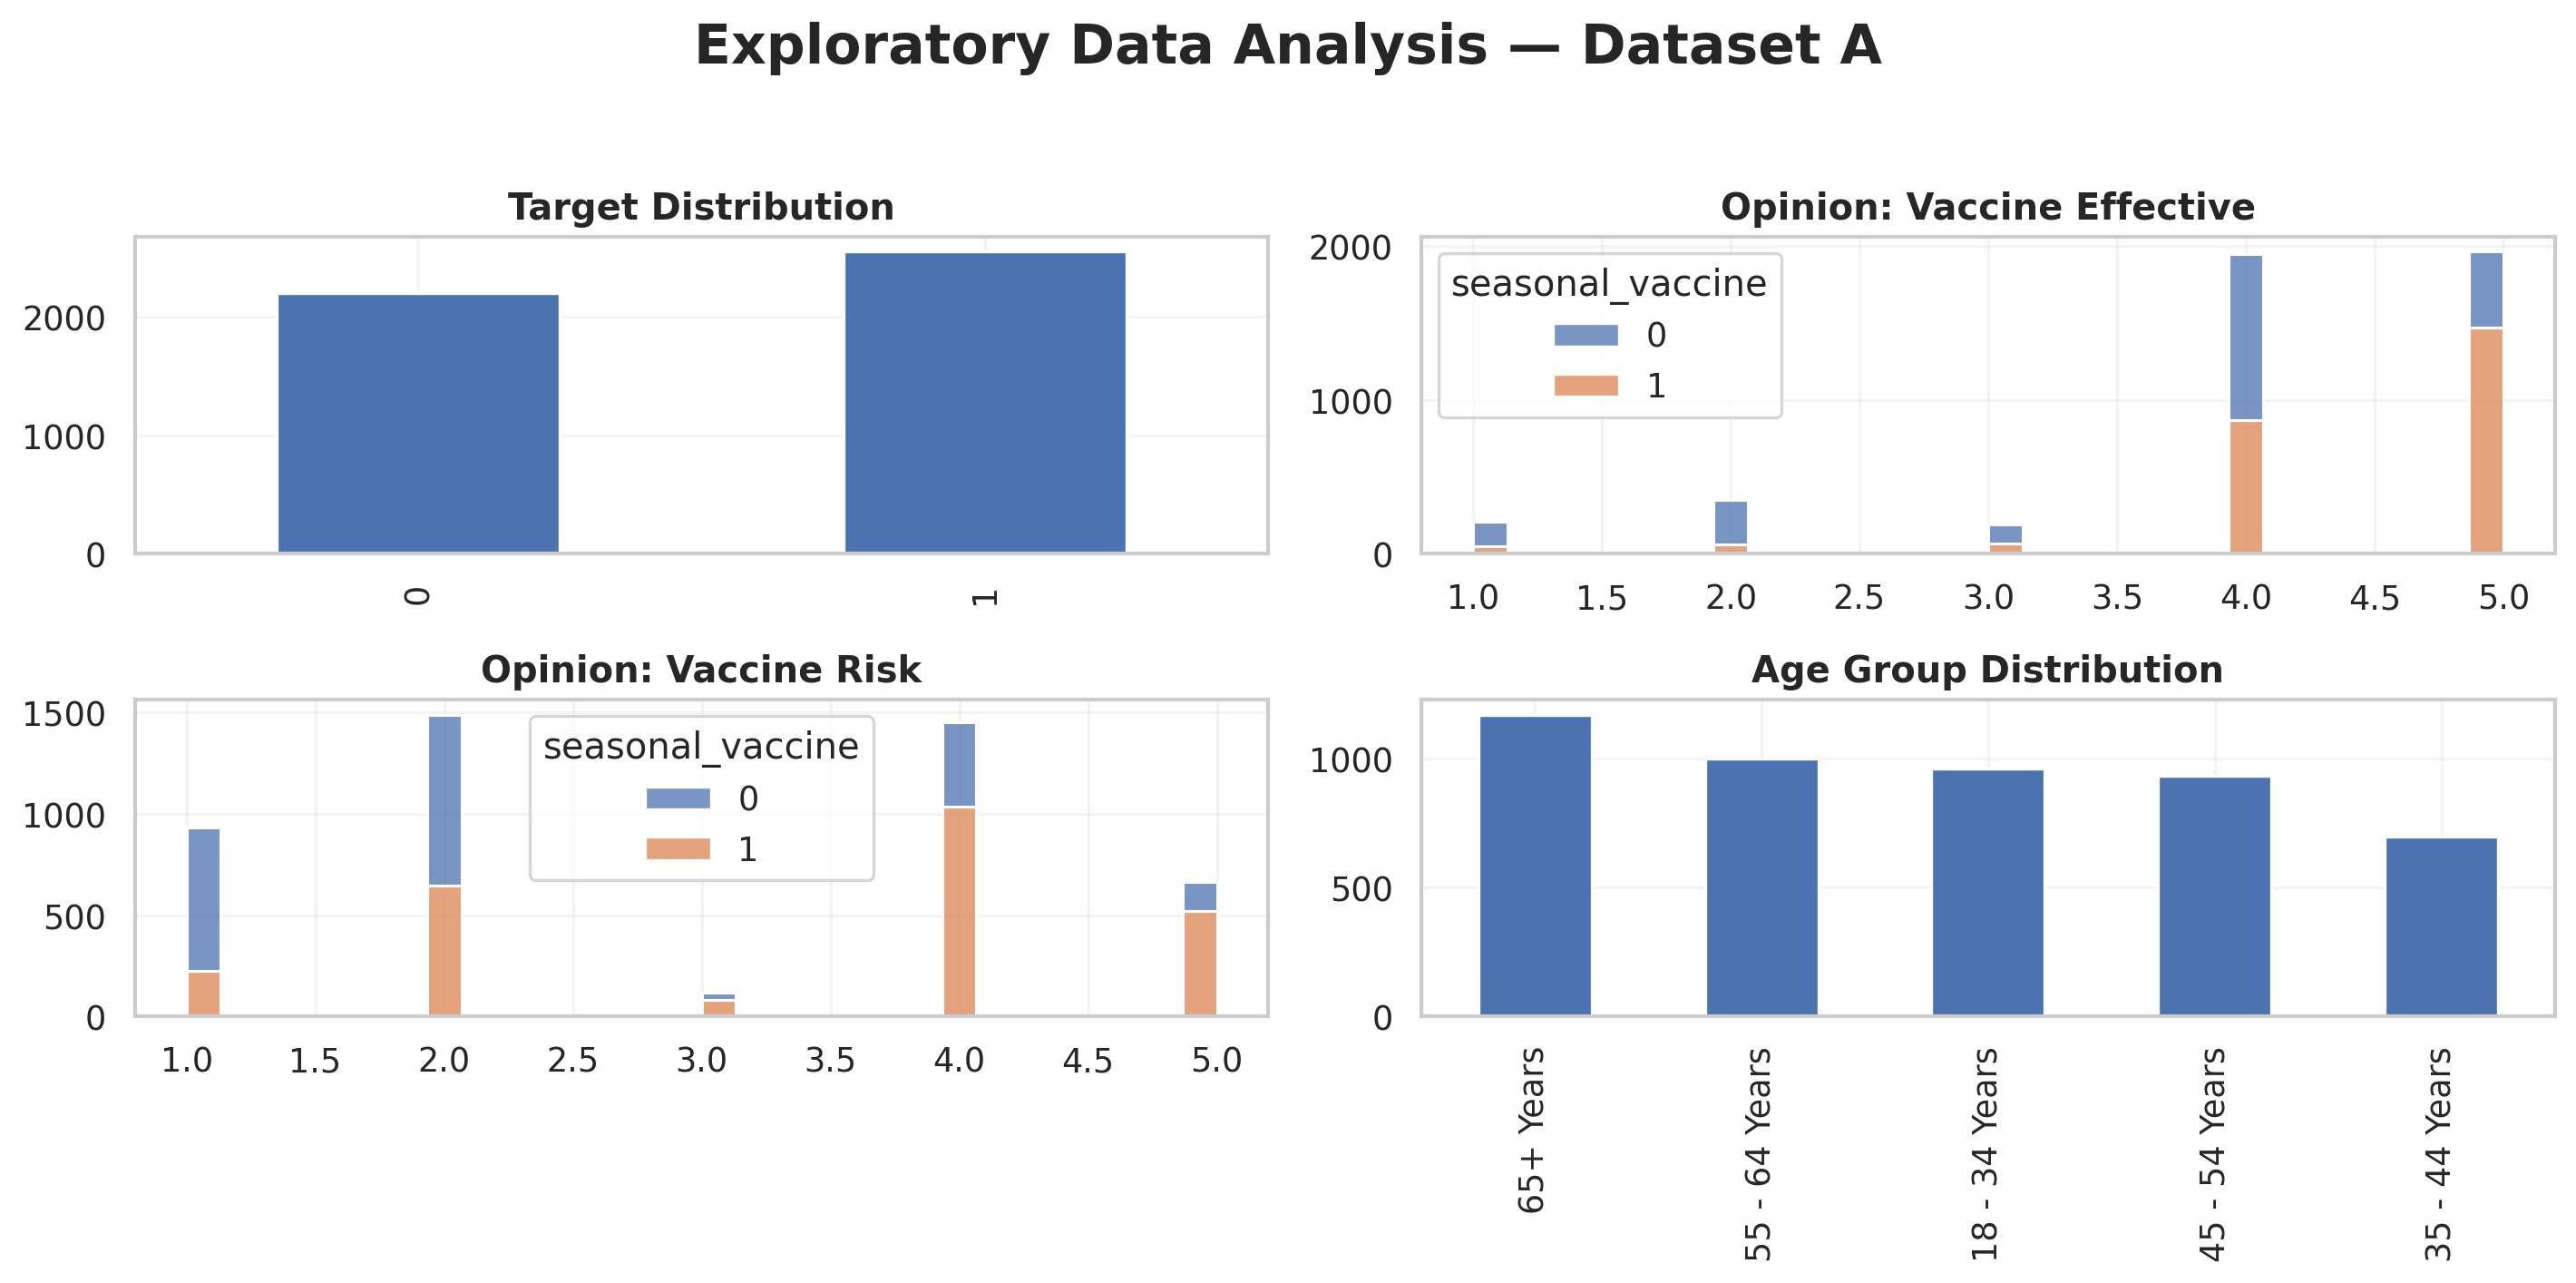

In [ ]:
# Compact EDA Grid — Presentation Fit (2x2)

fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle("Exploratory Data Analysis — Dataset A", fontsize=18, weight="bold")

plots = [
    ("Target Distribution", lambda ax: df_train[TARGET].value_counts().sort_index().plot(kind="bar", ax=ax)),
    ("Opinion: Vaccine Effective", lambda ax: sns.histplot(data=df_train, x="opinion_seas_vacc_effective", hue=TARGET, multiple="stack", bins=30, ax=ax)),
    ("Opinion: Vaccine Risk", lambda ax: sns.histplot(data=df_train, x="opinion_seas_risk", hue=TARGET, multiple="stack", bins=30, ax=ax)),
    ("Age Group Distribution", lambda ax: df_train["age_group"].value_counts().head(8).plot(kind="bar", ax=ax))
]

for ax, (title, plot_fn) in zip(axes.flat, plots):
    plot_fn(ax)
    ax.set_title(title)
    ax.set_xlabel(""); ax.set_ylabel("")
    ax.grid(alpha=0.2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("EDA_Slide.png", dpi=300, bbox_inches="tight")
plt.show()


# **5. Data Pre-processing**

In [ ]:
# Cell 4 — Preprocessing (leak-safe, same pattern as Tutorial 3)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

# features/target
X = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").copy()
y = df_train[TARGET].copy()

# column splits
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

# train/valid split (stratified)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# preprocessors (fit on train only)
num_pipe = SimpleImputer(strategy="median")
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ]
)

# fit/transform
X_train_prep = preprocess.fit_transform(X_train)
X_valid_prep = preprocess.transform(X_valid)

print("X_train raw shape:", X_train.shape)
print("X_valid raw shape:", X_valid.shape)
print("X_train preprocessed shape:", X_train_prep.shape)
print("X_valid preprocessed shape:", X_valid_prep.shape)
print("Numerical cols:", len(num_cols), "| Categorical cols:", len(cat_cols))


X_train raw shape: (3804, 29)
X_valid raw shape: (952, 29)
X_train preprocessed shape: (3804, 68)
X_valid preprocessed shape: (952, 68)
Numerical cols: 19 | Categorical cols: 10


In [ ]:
# Cell 4 — Pre-processing (One-Hot for all categoricals; no ordinal encoding)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

TARGET = "seasonal_vaccine"
ID_COL = "respondent_id"

# features/target (drop ID + target)
X = df_train.drop(columns=[TARGET, ID_COL], errors="ignore").copy()
y = df_train[TARGET].copy()
X_test = df_test.drop(columns=[ID_COL], errors="ignore").copy()

# stratified split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# column groups
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# imputers + encoders
num_pipe = SimpleImputer(strategy="median")
cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
)

# fit on train only; transform valid/test
X_train_prep = preprocess.fit_transform(X_train)
X_valid_prep = preprocess.transform(X_valid)
X_test_prep  = preprocess.transform(X_test)

print("X_train raw:", X_train.shape, "-> preprocessed:", X_train_prep.shape)
print("X_valid raw:", X_valid.shape, "-> preprocessed:", X_valid_prep.shape)
print("X_test  raw:", X_test.shape,  "-> preprocessed:", X_test_prep.shape)
print("num_cols:", len(num_cols), "| cat_cols:", len(cat_cols))


X_train raw: (3804, 29) -> preprocessed: (3804, 74)
X_valid raw: (952, 29) -> preprocessed: (952, 74)
X_test  raw: (4749, 29) -> preprocessed: (4749, 74)
num_cols: 19 | cat_cols: 10


# **6. Model Building**

In [ ]:
# Cell 5 — Step 4: Baseline models (Pipeline → LogisticRegression & XGB), simple validation metrics

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# assumes: preprocess, X_train, X_valid, y_train, y_valid already defined in previous cells

def eval_model(name, pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_valid)
    # use proba if available; else decision_function fallback
    if hasattr(pipe, "predict_proba"):
        y_proba = pipe.predict_proba(X_valid)[:, 1]
    else:
        # fallback produces scores that are not probs; still OK for ROC-AUC
        y_proba = pipe.decision_function(X_valid)
    auc = roc_auc_score(y_valid, y_proba)
    f1 = f1_score(y_valid, y_pred)
    acc = accuracy_score(y_valid, y_pred)
    cm = confusion_matrix(y_valid, y_pred)
    print(f"\n[{name}] ROC-AUC: {auc:.4f} | F1: {f1:.4f} | Acc: {acc:.4f}")
    print("Confusion matrix:\n", cm)
    return {"name": name, "auc": auc, "f1": f1, "acc": acc}

# 1) Logistic Regression (fast linear baseline)
pipe_lr = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", LogisticRegression(
        solver="liblinear",
        class_weight="balanced",
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    ))
])

# 2) XGBoost (strong tree baseline)
pipe_xgb = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", XGBClassifier(
        n_estimators=500,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42
    ))
])

# 3) Voting Classifier (Ensemble)
voting = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=500, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ],
    voting='soft'
)
pipe_vote = Pipeline([('pre', preprocess), ('clf', voting)])


results = []
results.append(eval_model("LogisticRegression", pipe_lr))
results.append(eval_model("XGBoost", pipe_xgb))
results.append(eval_model("Voting_RF_XGB_KNN", pipe_vote))

# simple leaderboard
results_sorted = sorted(results, key=lambda d: d["auc"], reverse=True)
print("\nValidation leaderboard (by ROC-AUC):")
for r in results_sorted:
    print(f"- {r['name']}: AUC={r['auc']:.4f} | F1={r['f1']:.4f} | Acc={r['acc']:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



[LogisticRegression] ROC-AUC: 0.8474 | F1: 0.7924 | Acc: 0.7815
Confusion matrix:
 [[347  94]
 [114 397]]

[XGBoost] ROC-AUC: 0.8368 | F1: 0.7861 | Acc: 0.7731
Confusion matrix:
 [[339 102]
 [114 397]]

[Voting_RF_XGB_KNN] ROC-AUC: 0.8240 | F1: 0.7730 | Acc: 0.7595
Confusion matrix:
 [[333 108]
 [121 390]]

Validation leaderboard (by ROC-AUC):
- LogisticRegression: AUC=0.8474 | F1=0.7924 | Acc=0.7815
- XGBoost: AUC=0.8368 | F1=0.7861 | Acc=0.7731
- Voting_RF_XGB_KNN: AUC=0.8240 | F1=0.7730 | Acc=0.7595


# **7. Hyper-parameter Tuning**

In [ ]:
# Cell 6 — Stratified 5-fold CV, quick tuning, and threshold sweep on validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipelines sharing the same preprocess from Cell 4
lr_grid = [
    {"clf__C": c, "clf__class_weight": "balanced"} for c in [0.25, 0.5, 1.0, 2.0, 4.0]
]
xgb_grid = []
for n in [300, 600, 900]:
    for md in [3, 5, 7]:
        for lr in [0.05, 0.1]:
            xgb_grid.append({"clf__n_estimators": n, "clf__max_depth": md, "clf__learning_rate": lr})

def cv_search(base_pipe, param_list, name):
    best_auc, best_params = -1.0, None
    for params in param_list:
        pipe = Pipeline([("pre", preprocess), ("clf", base_pipe)])
        pipe.set_params(**params)
        auc = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc").mean()
        if auc > best_auc:
            best_auc, best_params = auc, params
    print(f"[CV] {name} best AUC={best_auc:.4f} params={best_params}")
    return best_auc, best_params

# 1) Logistic Regression CV search
lr_base = LogisticRegression(solver="liblinear", max_iter=1000, random_state=42)
lr_best_auc, lr_best_params = cv_search(lr_base, lr_grid, "LogisticRegression")

# 2) XGBoost CV search
xgb_base = XGBClassifier(
    subsample=0.9, colsample_bytree=0.9, reg_lambda=1.0,
    eval_metric="logloss", tree_method="hist", random_state=42
)
xgb_best_auc, xgb_best_params = cv_search(xgb_base, xgb_grid, "XGBoost")

# Pick best family
if lr_best_auc >= xgb_best_auc:
    best_name, best_base, best_params = "LogisticRegression", lr_base, lr_best_params
else:
    best_name, best_base, best_params = "XGBoost", xgb_base, xgb_best_params

# Fit best on train, evaluate on validation with threshold sweep
best_pipe = Pipeline([("pre", preprocess), ("clf", best_base)])
best_pipe.set_params(**best_params)
best_pipe.fit(X_train, y_train)

if hasattr(best_pipe, "predict_proba"):
    val_scores = best_pipe.predict_proba(X_valid)[:, 1]
else:
    val_scores = best_pipe.decision_function(X_valid)

# Threshold sweep to maximize F1
ths = np.linspace(0.2, 0.8, 25)
f1s = []
for t in ths:
    y_pred = (val_scores >= t).astype(int)
    f1s.append(f1_score(y_valid, y_pred))
best_t = float(ths[int(np.argmax(f1s))])

# Report at 0.5 and at best threshold
def report_at(th):
    y_pred = (val_scores >= th).astype(int)
    auc = roc_auc_score(y_valid, val_scores)
    f1 = f1_score(y_valid, y_pred)
    acc = accuracy_score(y_valid, y_pred)
    return auc, f1, acc

auc_05, f1_05, acc_05 = report_at(0.5)
auc_bt, f1_bt, acc_bt = report_at(best_t)

print(f"\nBest model: {best_name} with {best_params}")
print(f"Validation (thr=0.50): AUC={auc_05:.4f} | F1={f1_05:.4f} | Acc={acc_05:.4f}")
print(f"Validation (thr={best_t:.3f}): AUC={auc_bt:.4f} | F1={f1_bt:.4f} | Acc={acc_bt:.4f}")


[CV] LogisticRegression best AUC=0.8462 params={'clf__C': 0.5, 'clf__class_weight': 'balanced'}
[CV] XGBoost best AUC=0.8518 params={'clf__n_estimators': 300, 'clf__max_depth': 3, 'clf__learning_rate': 0.05}

Best model: XGBoost with {'clf__n_estimators': 300, 'clf__max_depth': 3, 'clf__learning_rate': 0.05}
Validation (thr=0.50): AUC=0.8554 | F1=0.8004 | Acc=0.7857
Validation (thr=0.425): AUC=0.8554 | F1=0.8060 | Acc=0.7815


# **8. Performance Analysis**

AUC: 0.8554 | F1@0.50: 0.8004 | Acc@0.50: 0.7857
Confusion matrix @0.50:
 [[339 102]
 [102 409]]
Best threshold ~ 0.420 -> F1=0.8086 | Acc=0.7836


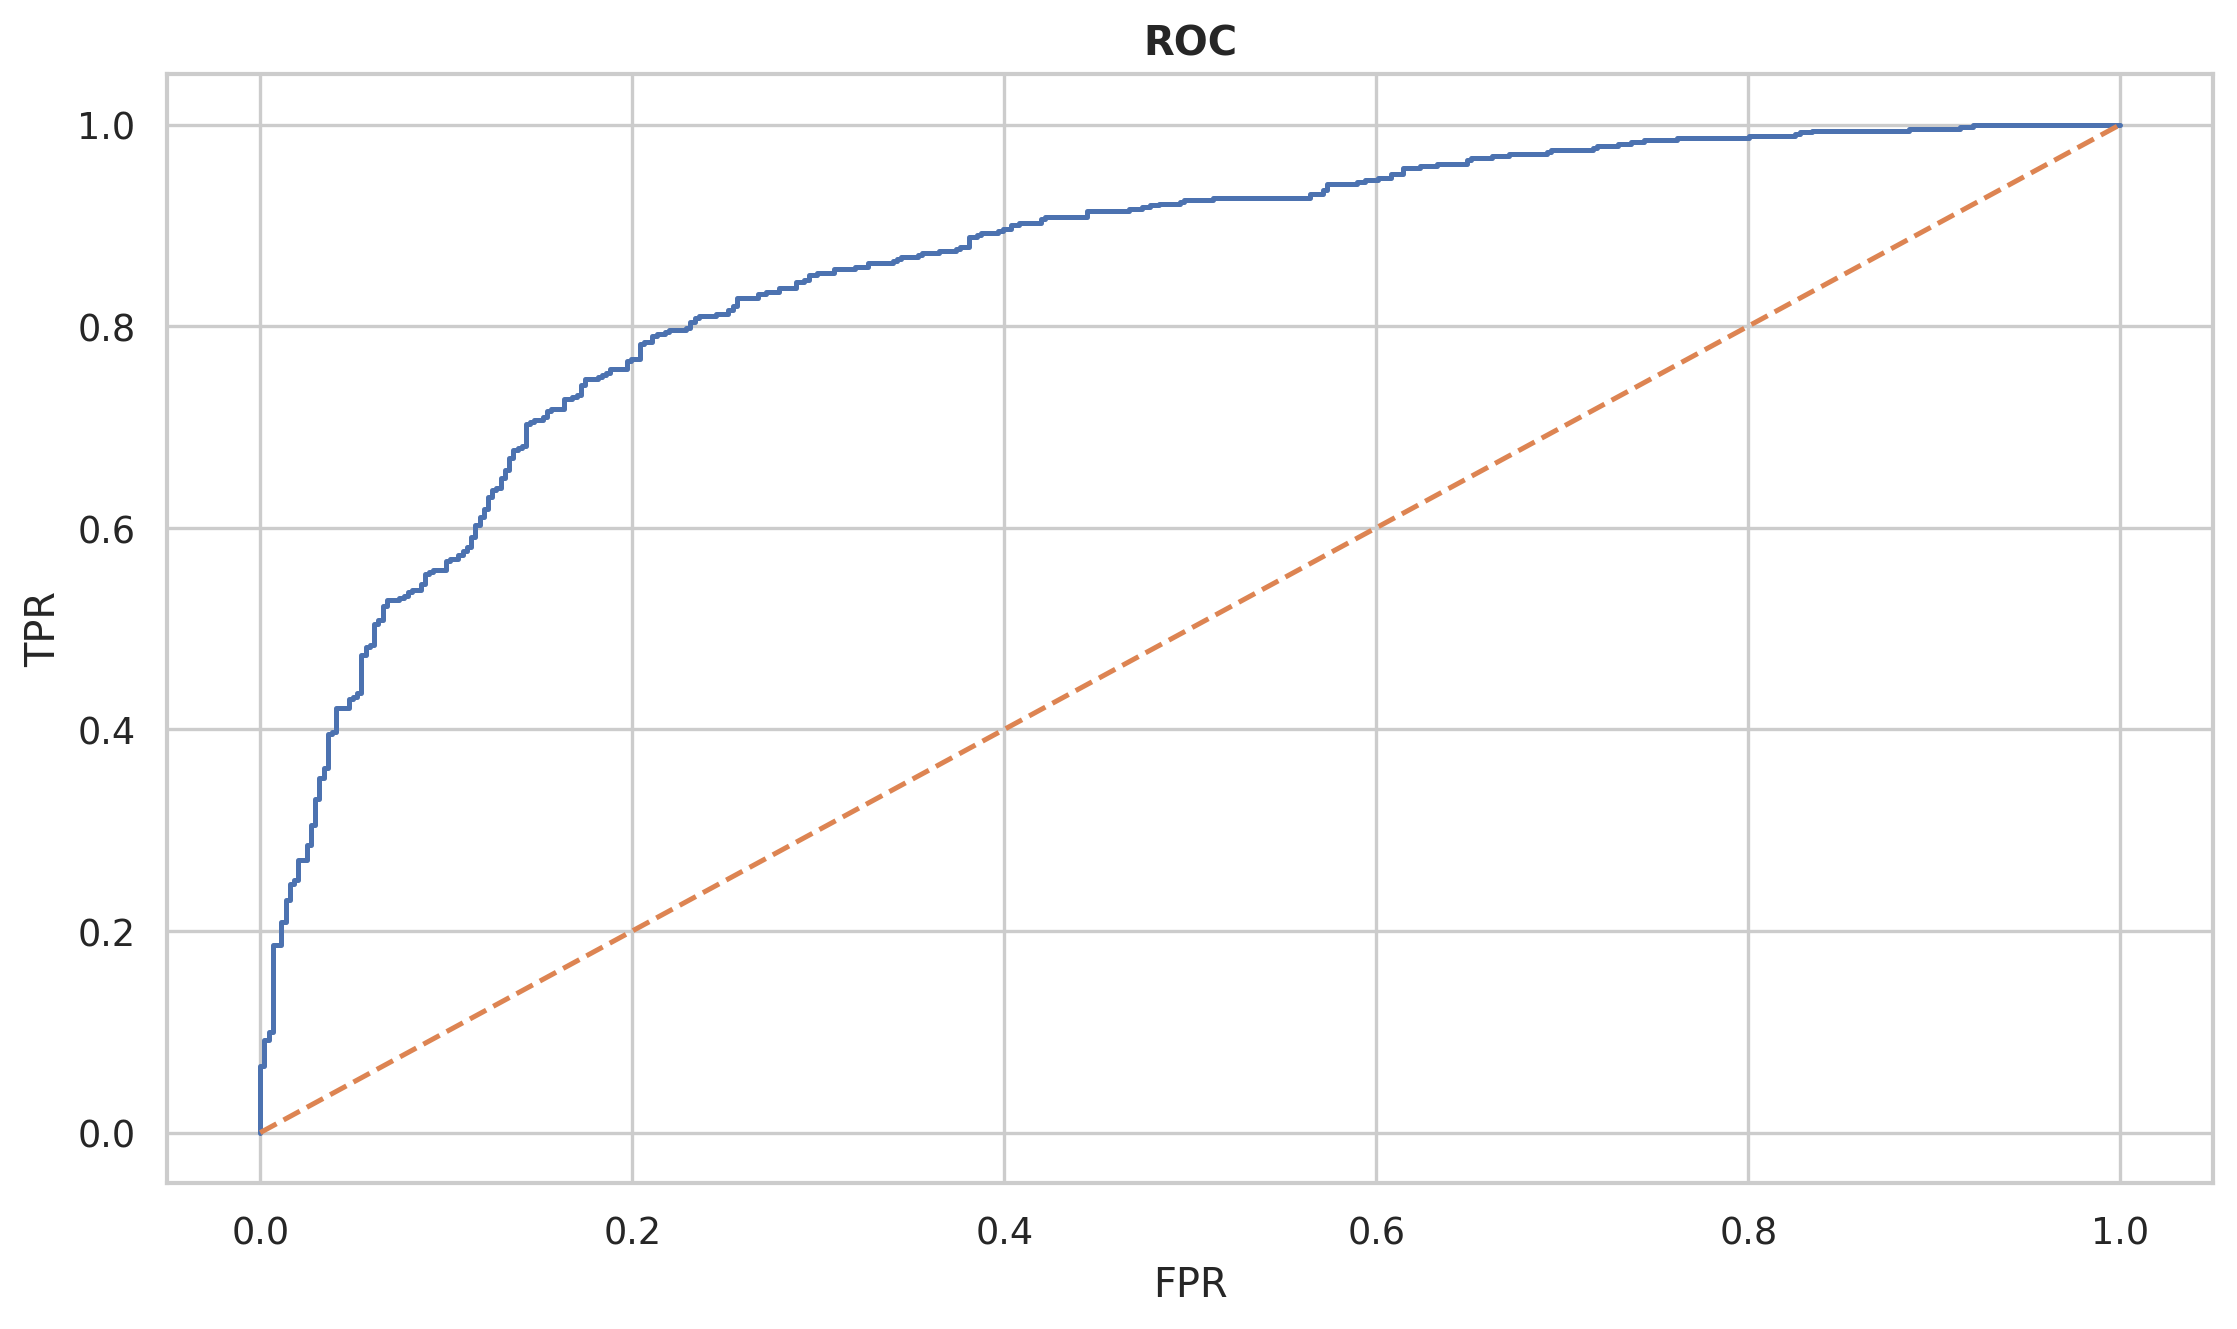

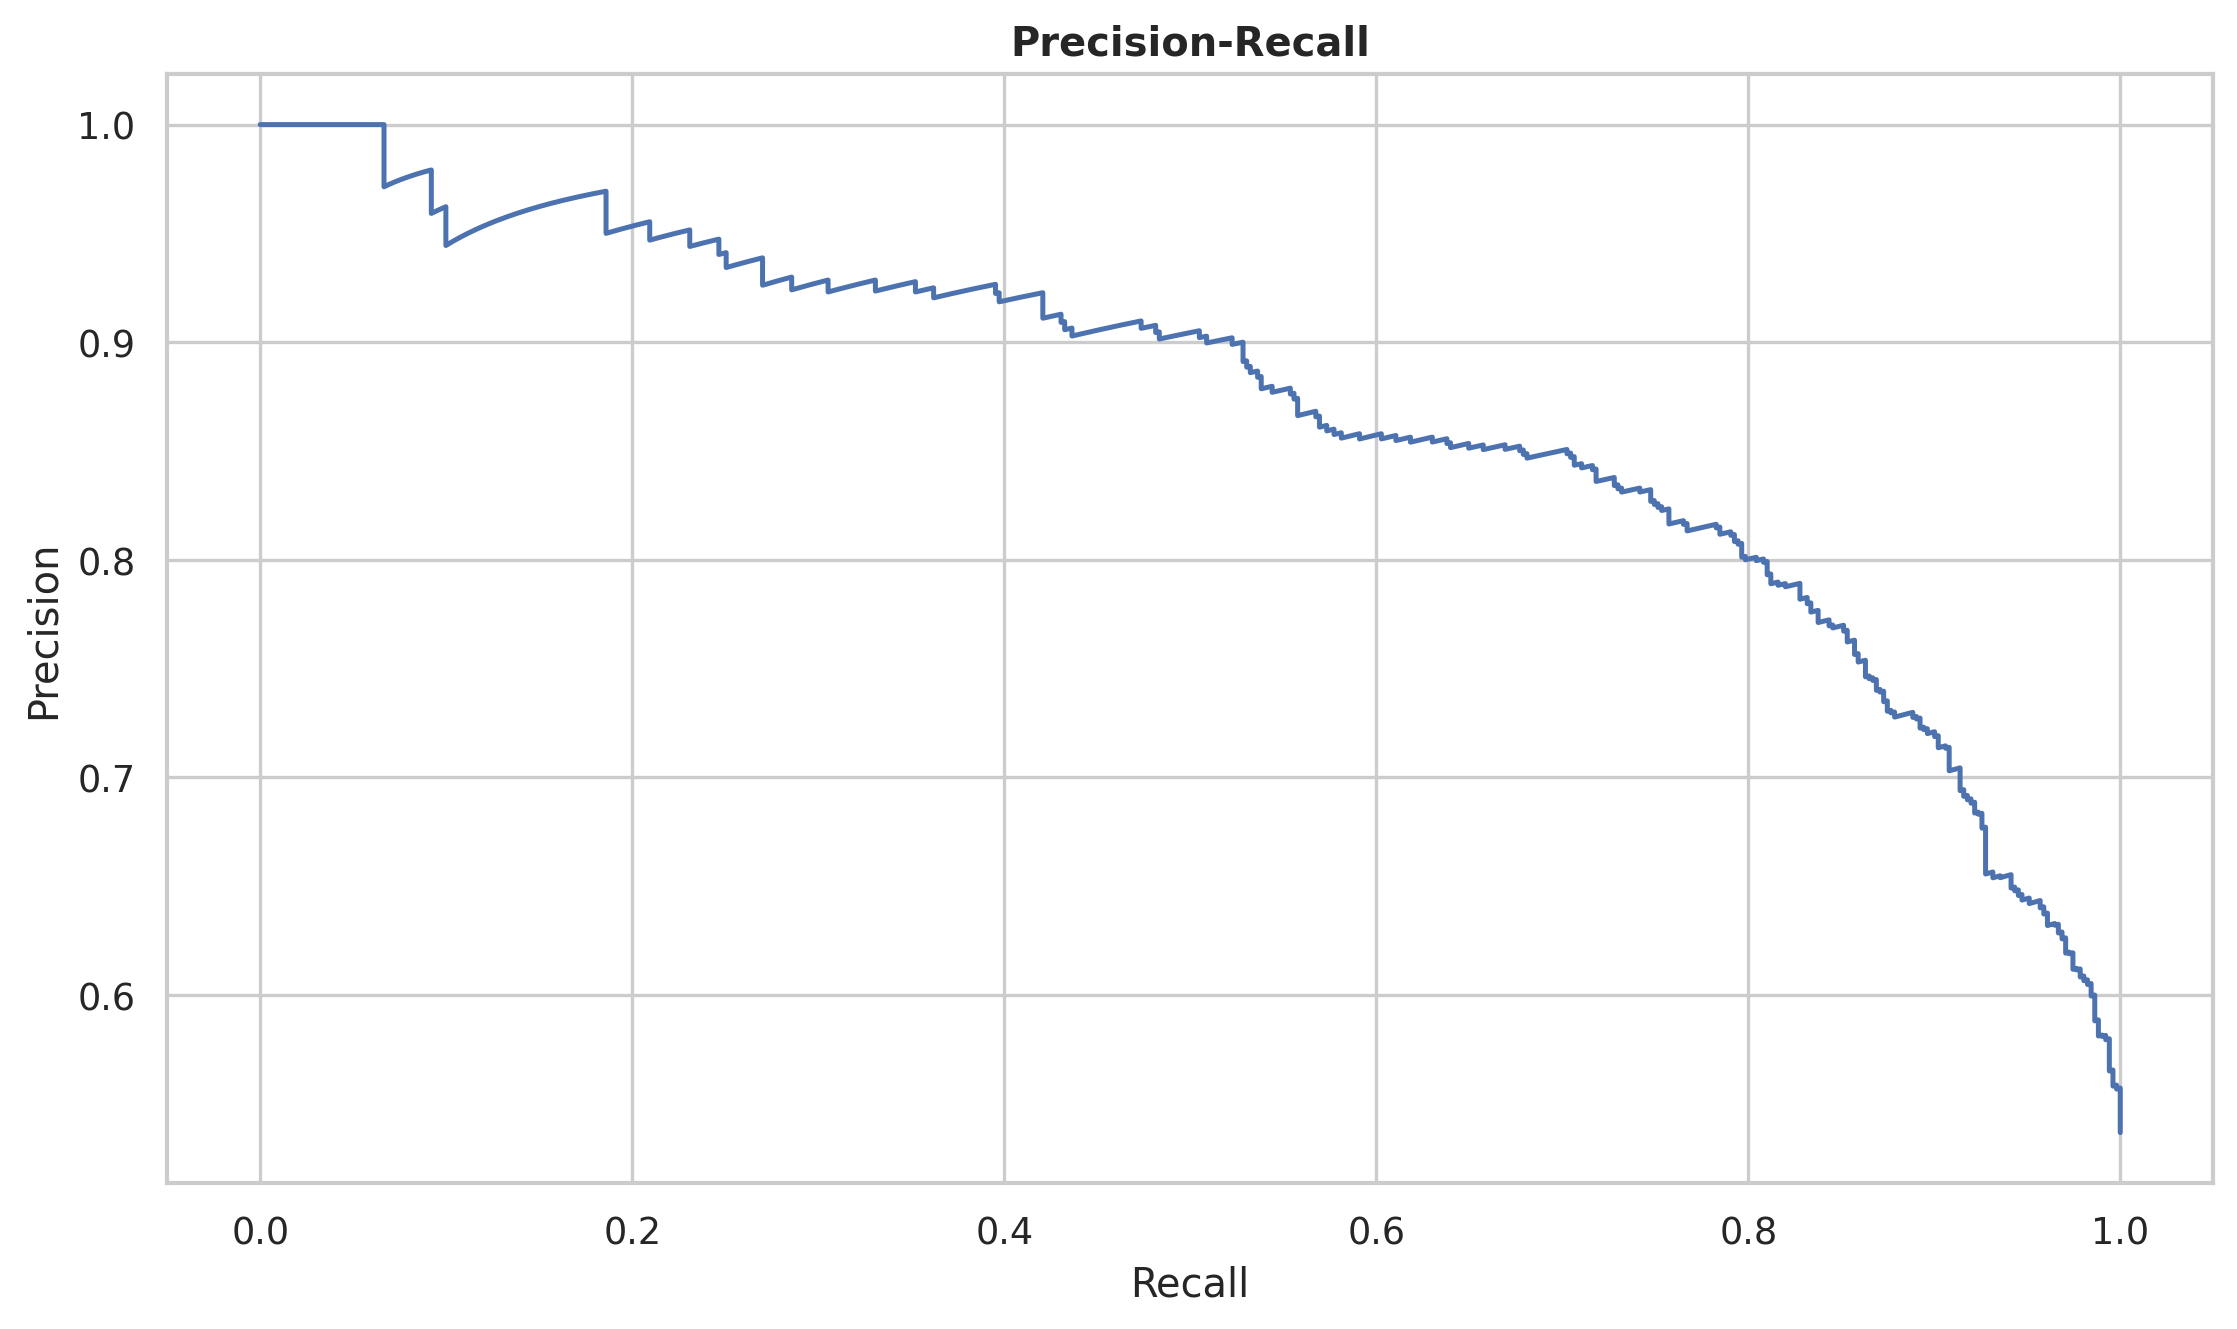

In [ ]:
# Cell 8 — Step 5: Performance analysis on validation (simple, teacher style)

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    roc_auc_score, f1_score, accuracy_score, confusion_matrix,
    roc_curve, precision_recall_curve
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

# assumes: X_train, X_valid, y_train, y_valid, preprocess from Cell 4

best_params = {"n_estimators": 300, "max_depth": 3, "learning_rate": 0.05}

val_pipe = Pipeline(steps=[
    ("pre", preprocess),
    ("clf", XGBClassifier(
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        eval_metric="logloss",
        tree_method="hist",
        random_state=42,
        **best_params
    ))
])

val_pipe.fit(X_train, y_train)

# scores and predictions
y_score = val_pipe.predict_proba(X_valid)[:, 1]
y_pred_05 = (y_score >= 0.5).astype(int)

# metrics @0.5
auc = roc_auc_score(y_valid, y_score)
f1  = f1_score(y_valid, y_pred_05)
acc = accuracy_score(y_valid, y_pred_05)
cm  = confusion_matrix(y_valid, y_pred_05)

print(f"AUC: {auc:.4f} | F1@0.50: {f1:.4f} | Acc@0.50: {acc:.4f}")
print("Confusion matrix @0.50:\n", cm)

# choose a better threshold by maximizing F1 on validation
ths = np.linspace(0.2, 0.8, 61)
f1s = [f1_score(y_valid, (y_score >= t).astype(int)) for t in ths]
best_t = float(ths[int(np.argmax(f1s))])
y_pred_bt = (y_score >= best_t).astype(int)
f1_bt = f1_score(y_valid, y_pred_bt)
acc_bt = accuracy_score(y_valid, y_pred_bt)
print(f"Best threshold ~ {best_t:.3f} -> F1={f1_bt:.4f} | Acc={acc_bt:.4f}")

# ROC curve
fpr, tpr, _ = roc_curve(y_valid, y_score)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC")
plt.show()

# PR curve
prec, rec, _ = precision_recall_curve(y_valid, y_score)
plt.plot(rec, prec)
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision-Recall")
plt.show()


# **9. Explainable AI (XAI)**

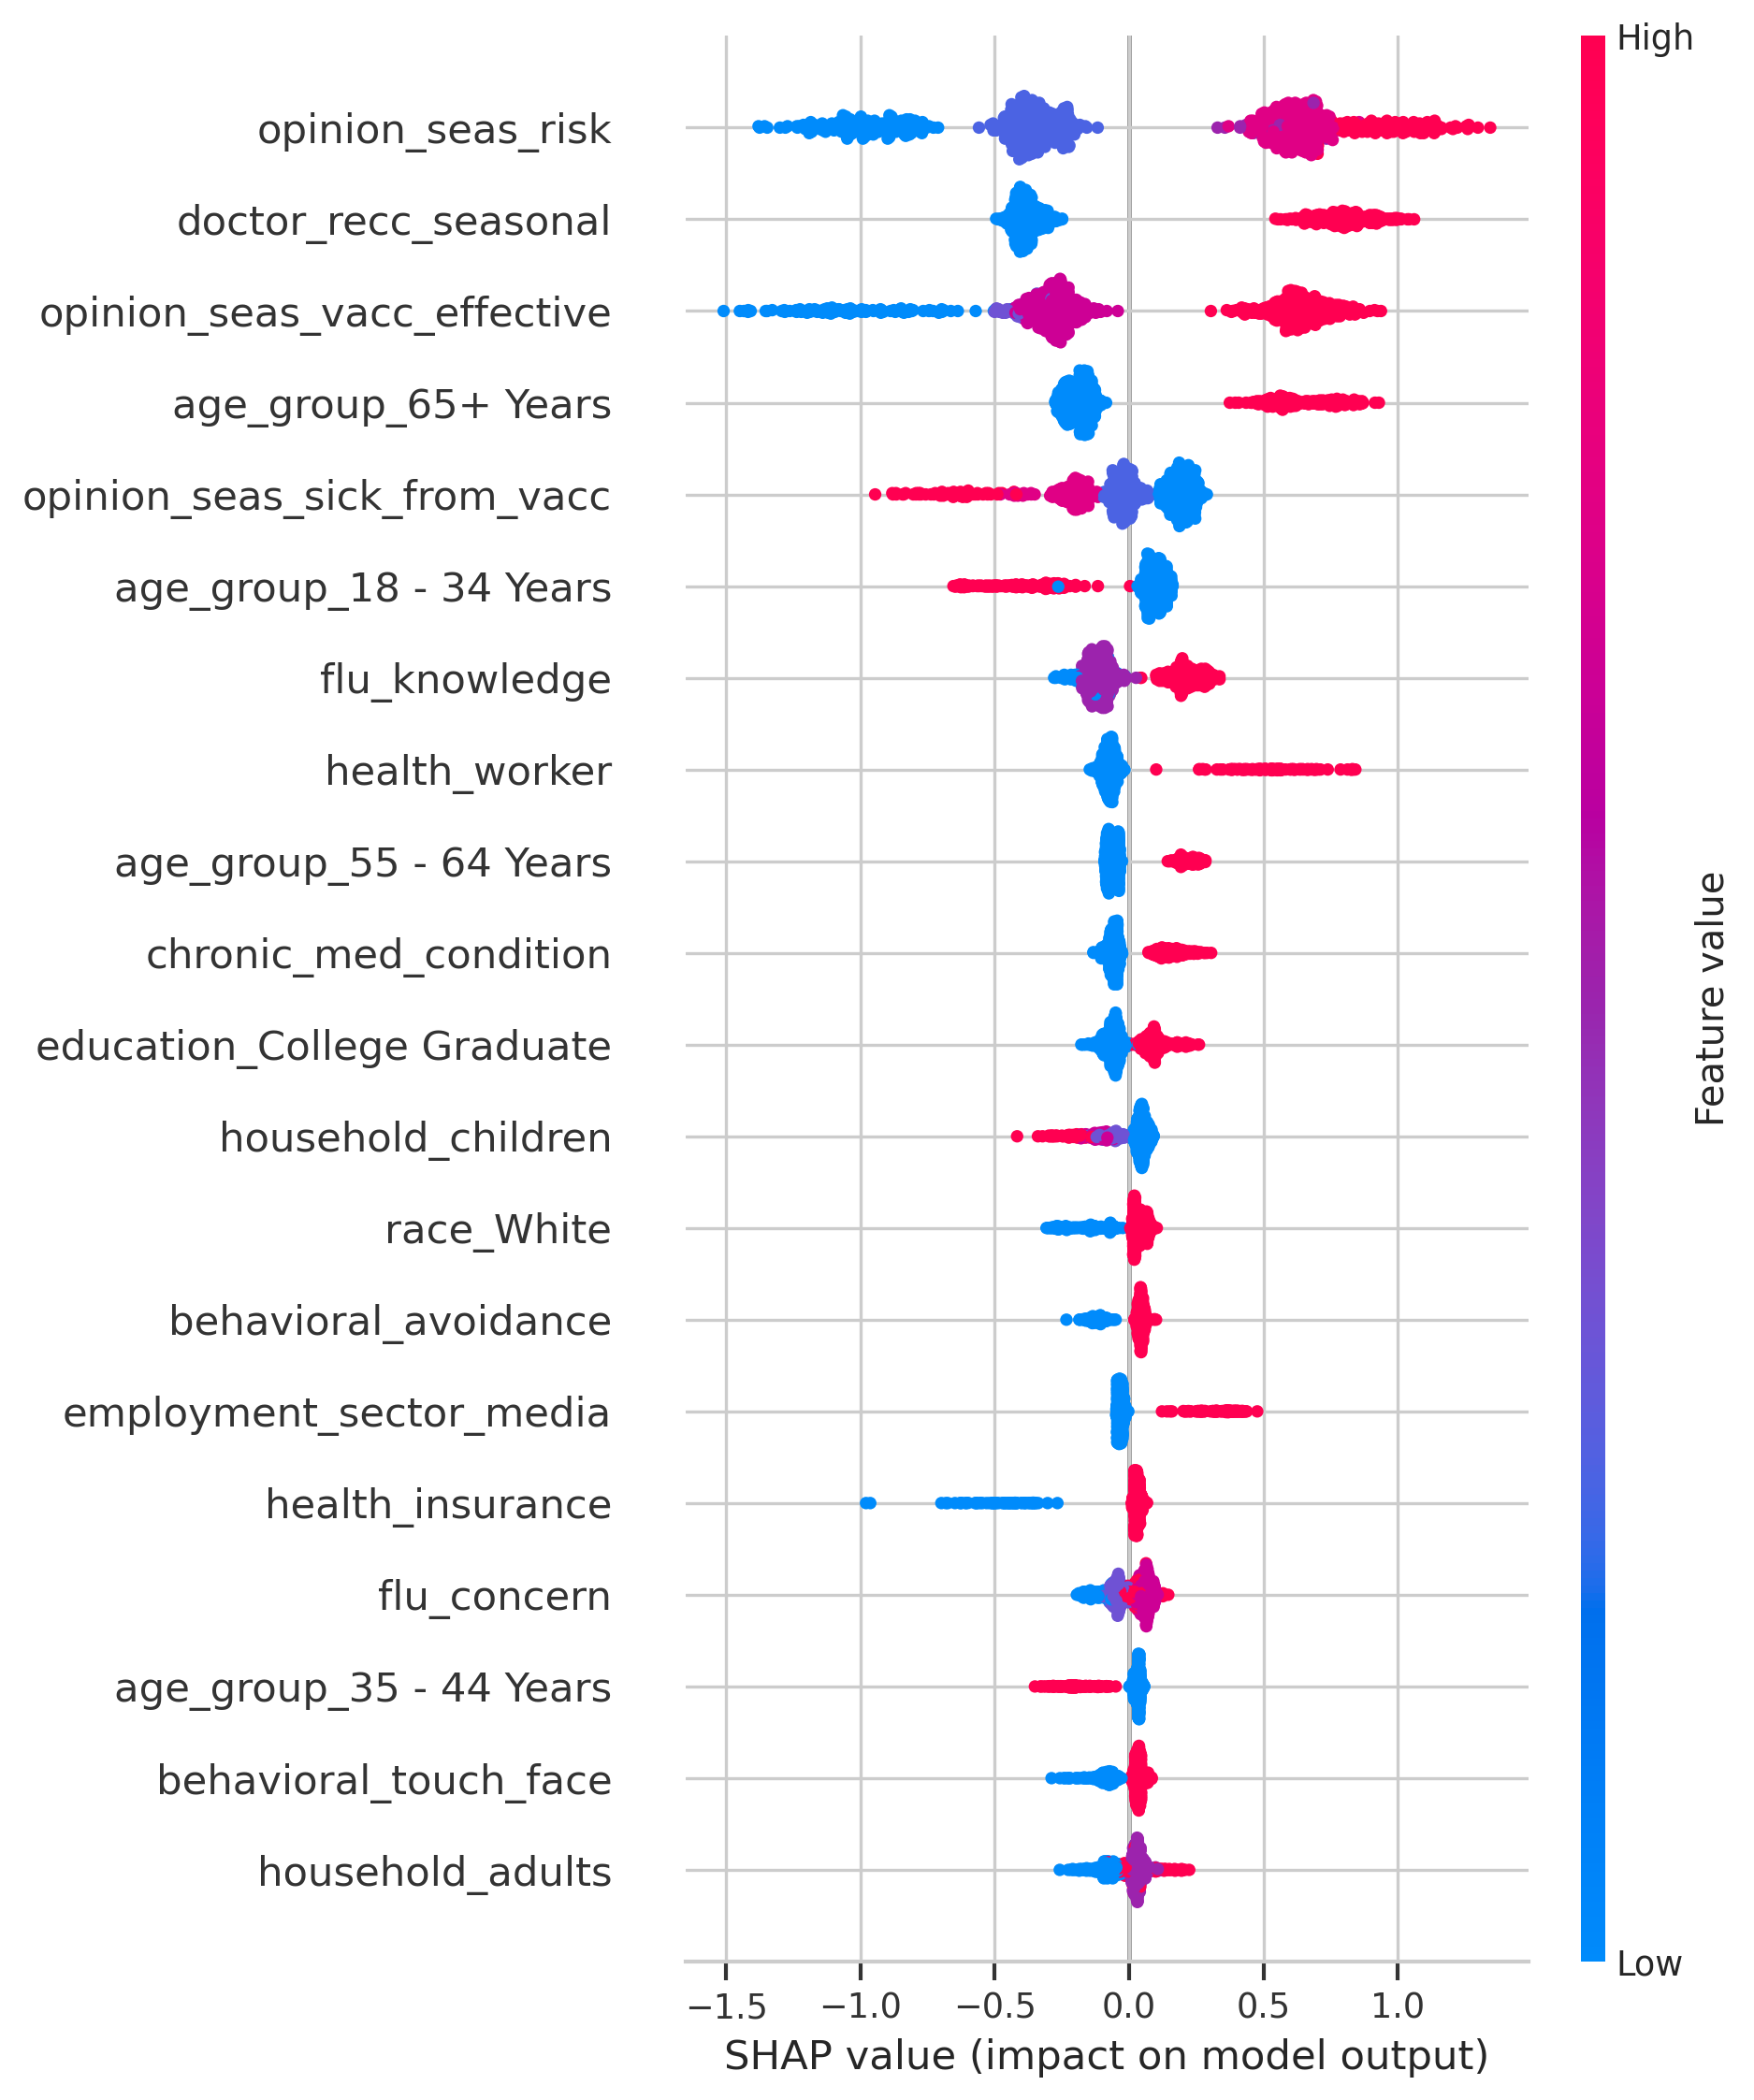

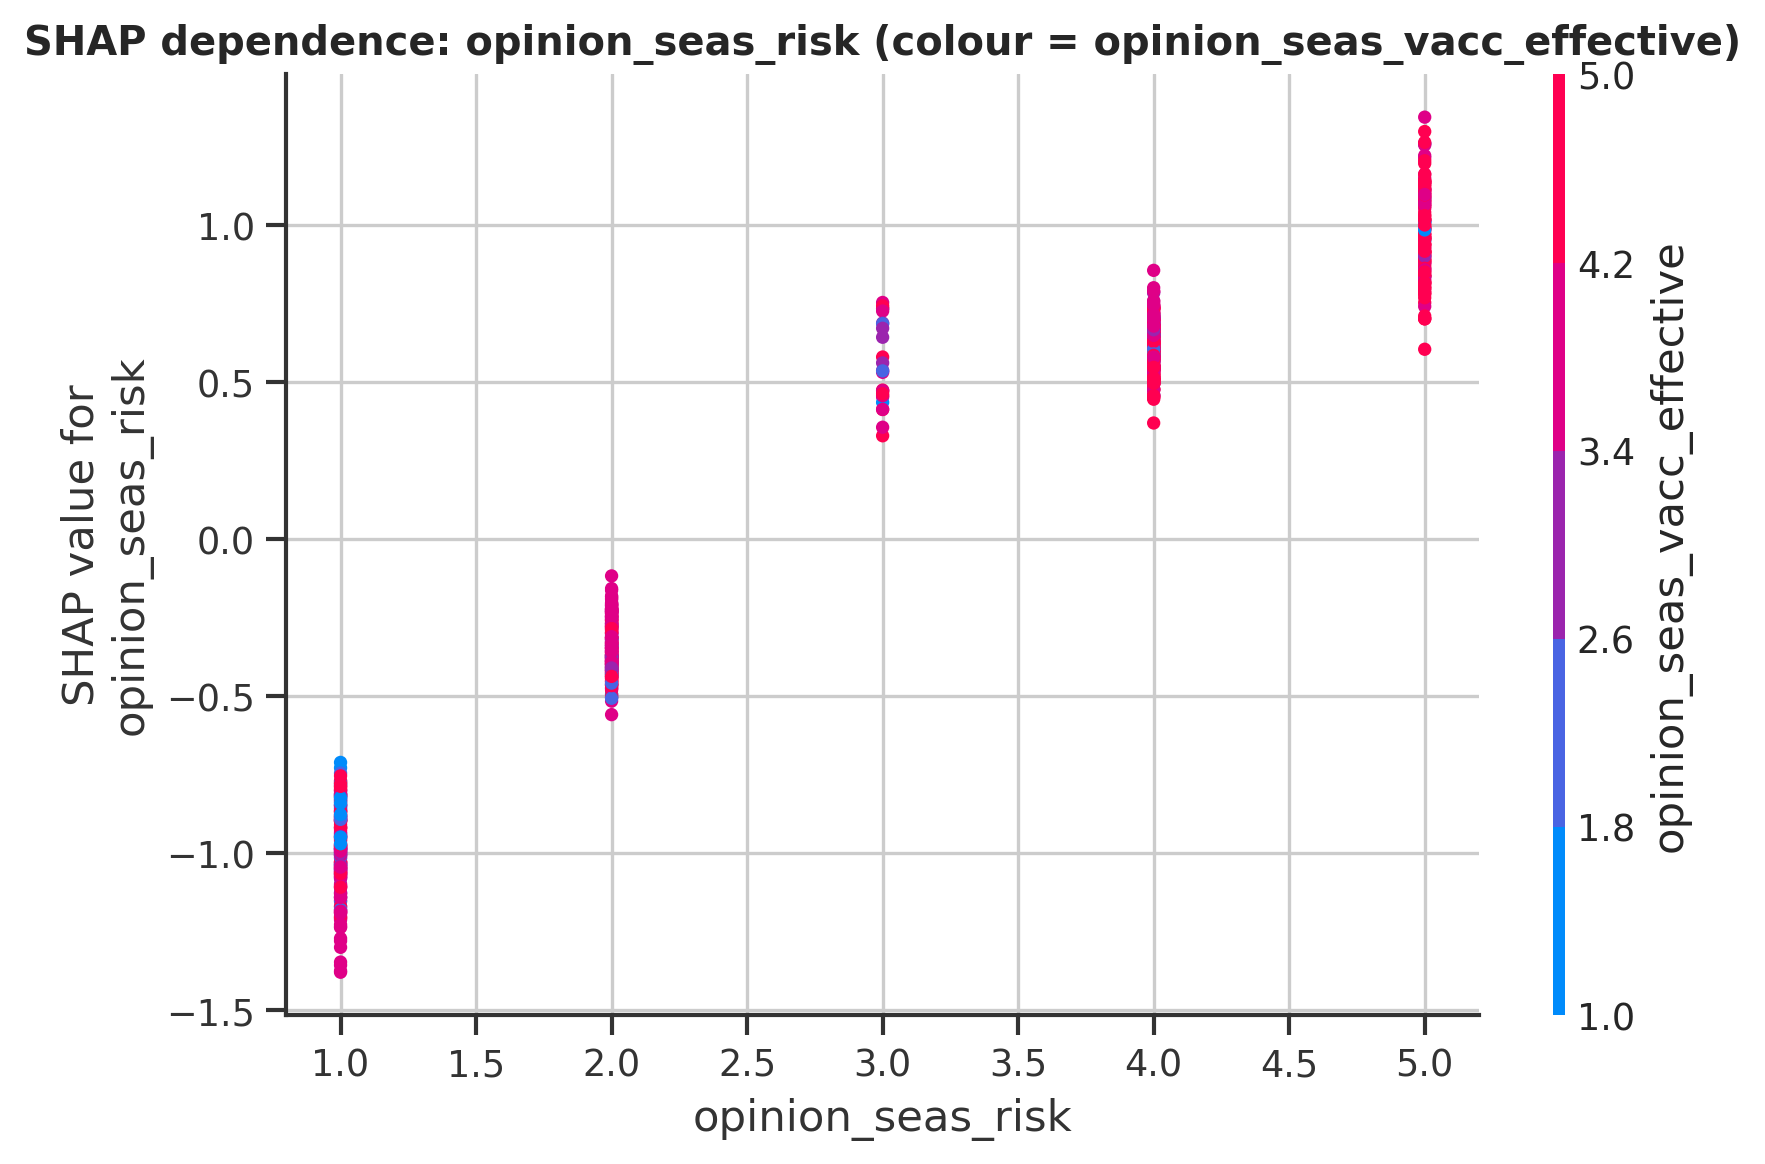

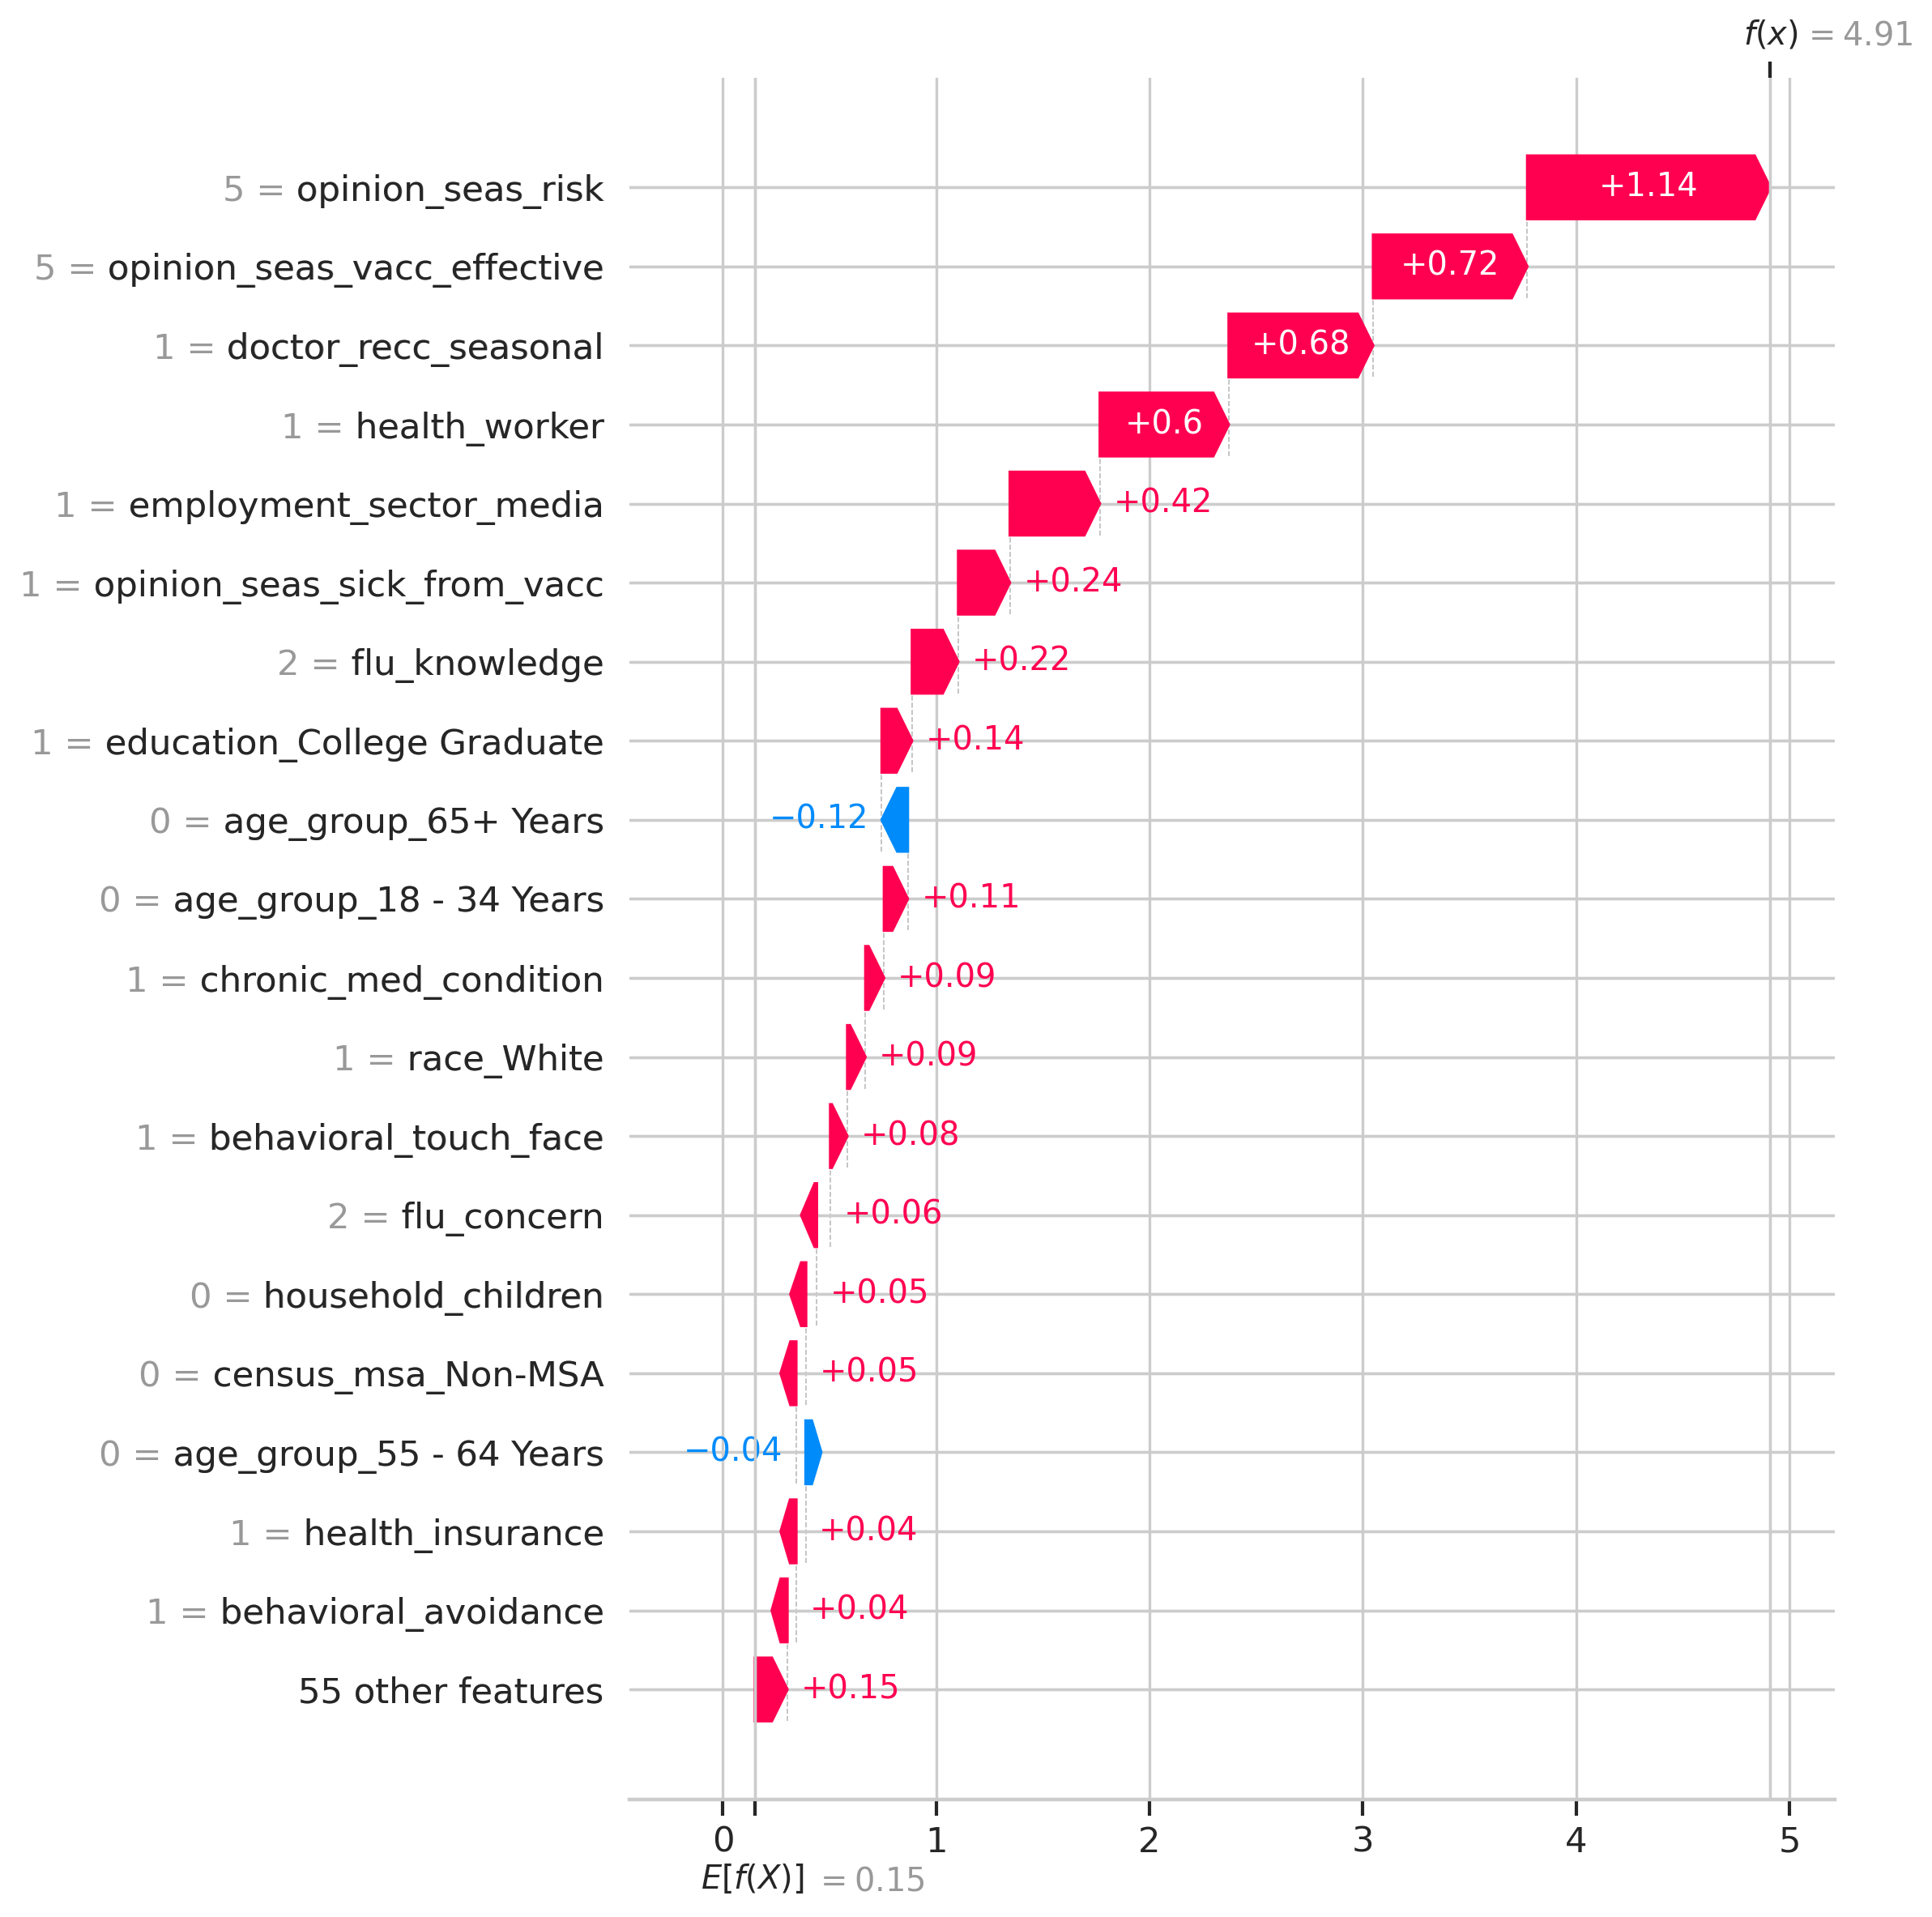

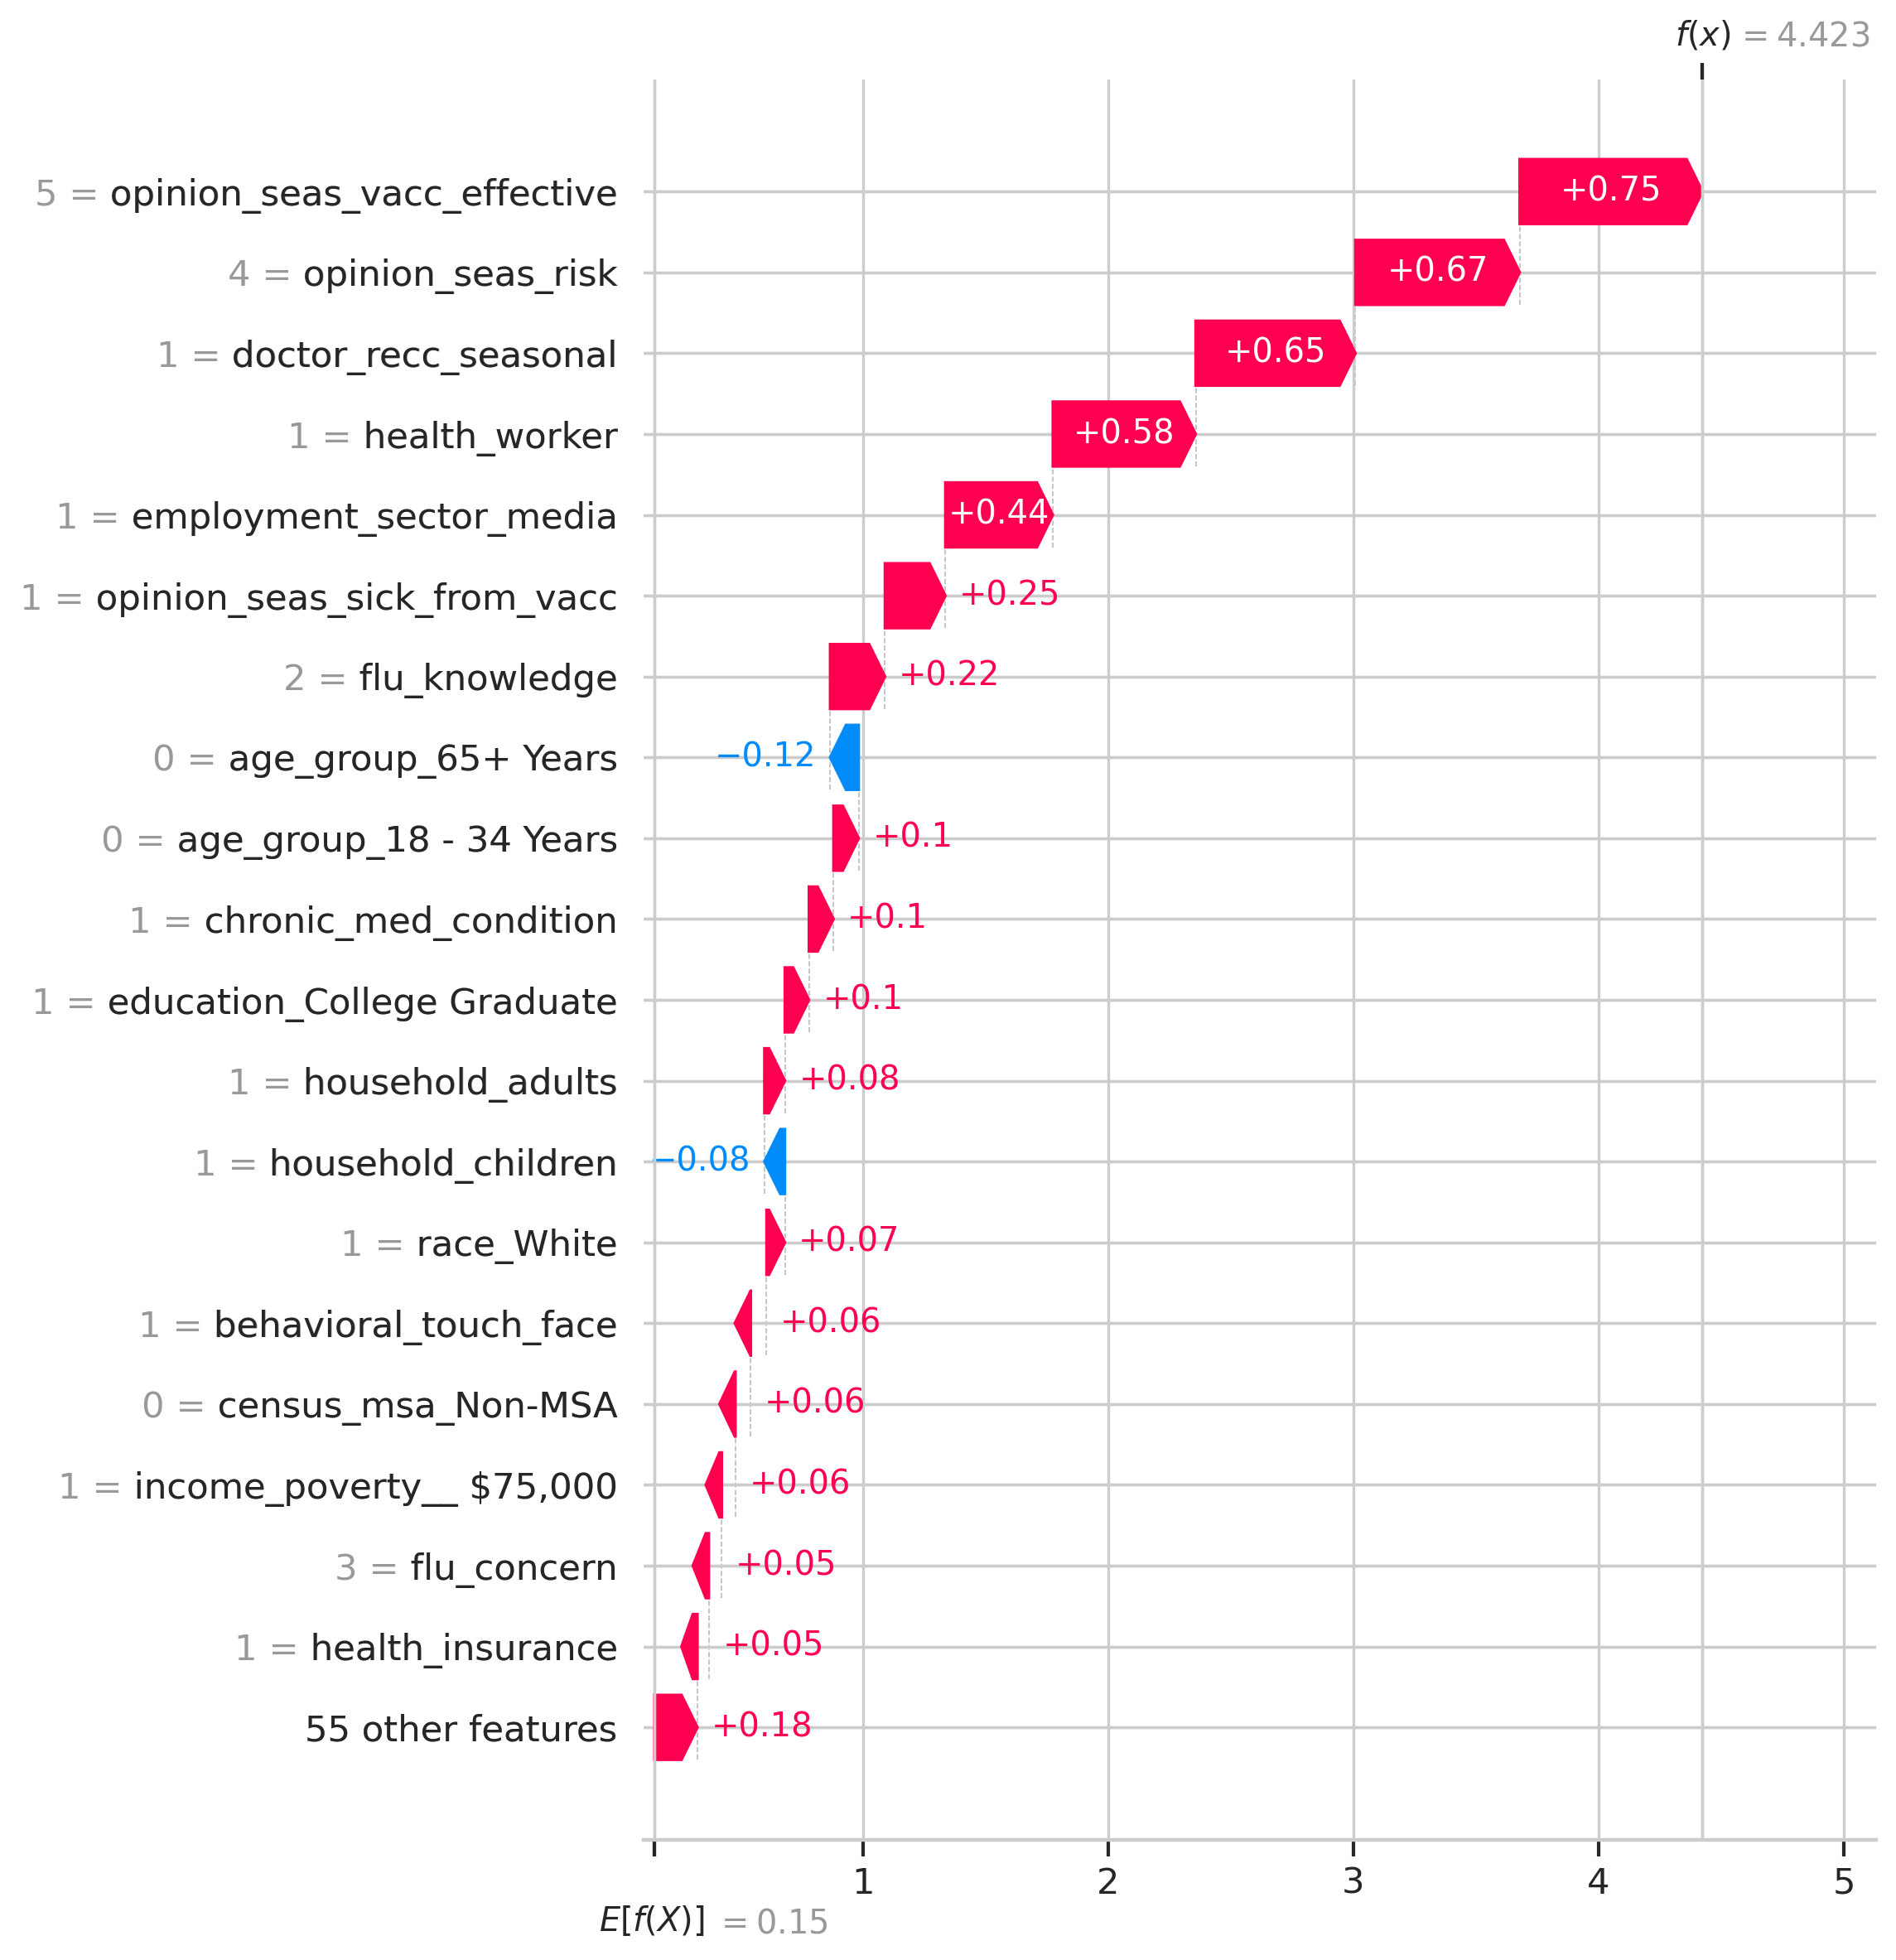

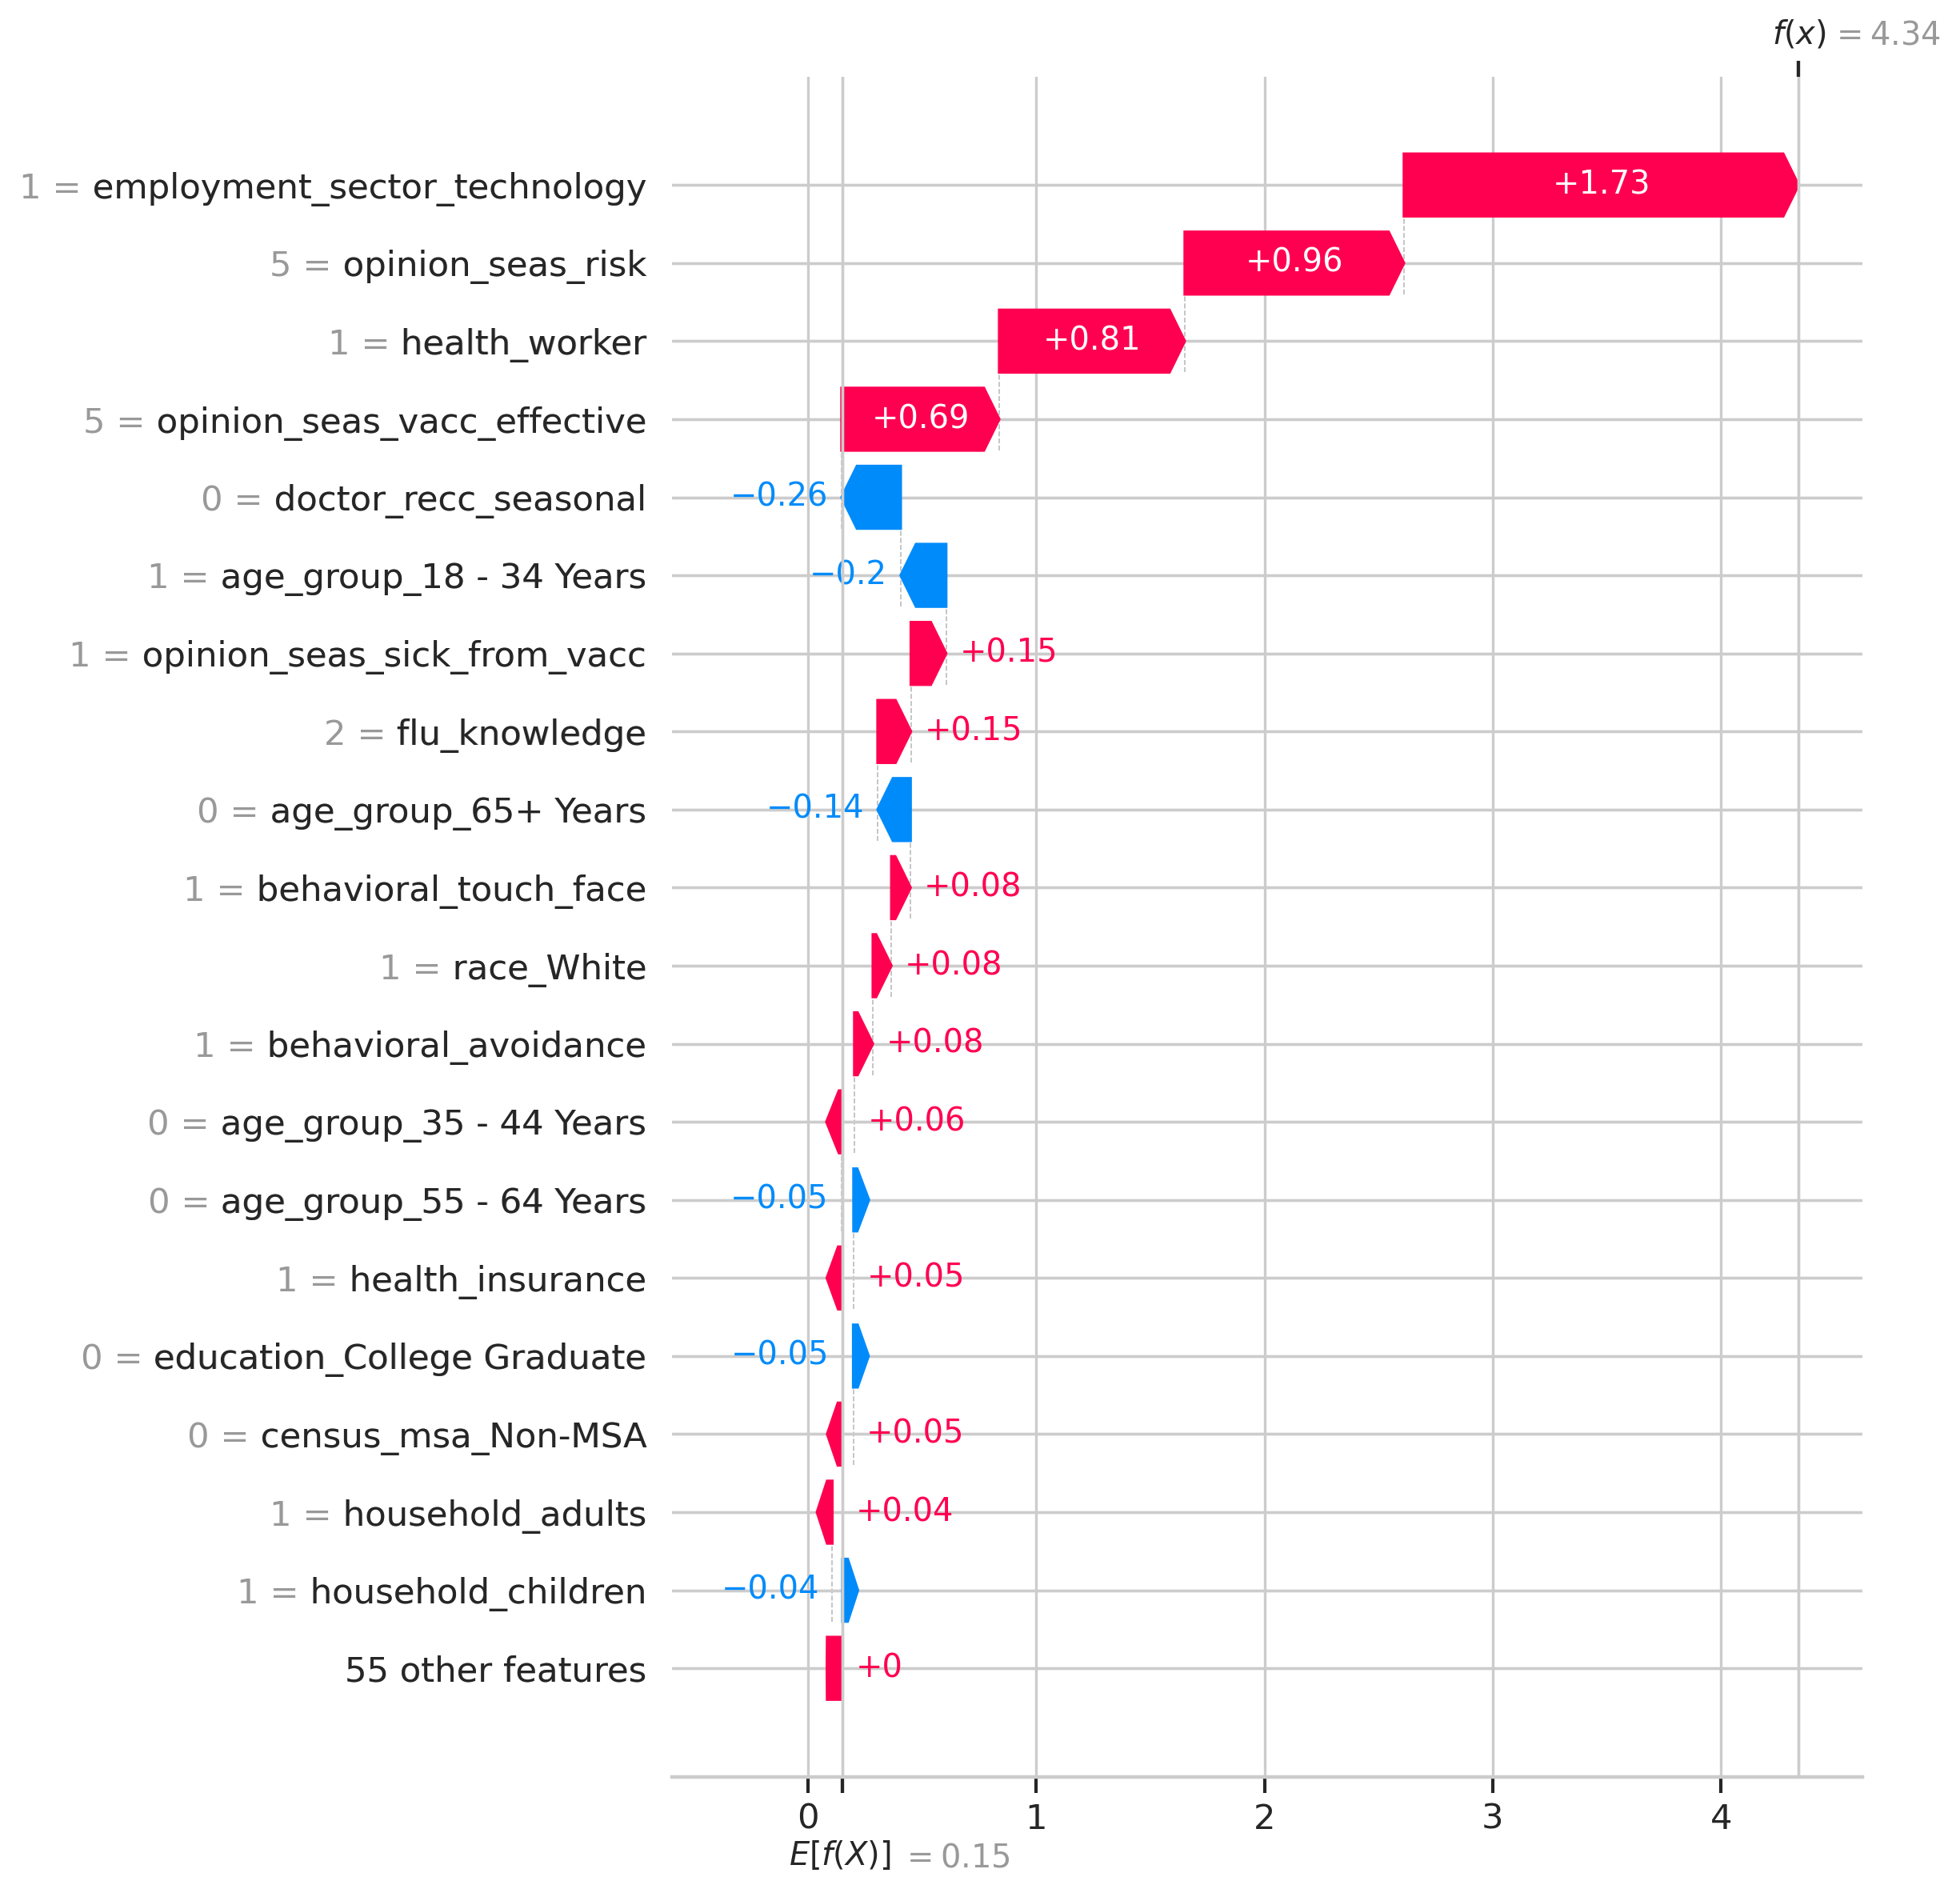

In [ ]:
# /notebooks/hackathon/xai_teacher_style.py
# === Teacher-style XAI (Beeswarm + Dependence + Waterfalls) for Pipeline+XGBoost ===
# Works with your existing: val_pipe (fitted), X_valid, y_valid, preprocess from earlier cells.

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import shap

# ---------- 0) Pull fitted parts ----------
pre   = val_pipe.named_steps["pre"]
model = val_pipe.named_steps["clf"]

# Post-OHE matrices (ensure leak-safe: transform valid only)
X_valid_prep = pre.transform(X_valid)
feature_names_raw = list(map(str, pre.get_feature_names_out()))
n_features = len(feature_names_raw)
assert X_valid_prep.shape[1] == n_features, "Preprocessed shape != #feature names."

# Convert to dense for SHAP plotting only (small copy). Keep sparse for model.
if hasattr(X_valid_prep, "toarray"):
    X_valid_plot = X_valid_prep.toarray()
else:
    X_valid_plot = np.asarray(X_valid_prep)

# ---------- 1) Sanitize names for XGBoost DMatrix ----------
_pat_forbidden = re.compile(r"[\[\]<>]")

def _sanitize(n: str) -> str:
    return _pat_forbidden.sub("_", n).replace(">", "_")

def _ensure_unique(names):
    seen, out = {}, []
    for nm in names:
        if nm in seen:
            seen[nm] += 1
            out.append(f"{nm}__{seen[nm]}")
        else:
            seen[nm] = 0
            out.append(nm)
    return out

sanitized = _ensure_unique([_sanitize(n) for n in feature_names_raw])

# Pretty display names to mimic lecture (strip transformer prefixes)
pretty = []
for n in sanitized:
    pretty.append(n.replace("num__", "").replace("cat__", ""))

# ---------- 2) Native SHAP from XGBoost (stable across versions) ----------
assert hasattr(model, "get_booster"), "Expected XGBClassifier in val_pipe."
dval = xgb.DMatrix(X_valid_prep, feature_names=sanitized)  # uses sanitized header
booster = model.get_booster()
contribs = booster.predict(dval, pred_contribs=True)       # [n_samples, n_features+1]
shap_values = contribs[:, :-1]                             # per-feature SHAP (log-odds)
base_values = contribs[:, -1]                              # bias term
val_proba   = val_pipe.predict_proba(X_valid)[:, 1]

# ---------- 3) (Teacher) SHAP Beeswarm (aka “2nd photo”) ----------
# Note: Passing arrays directly mirrors SHAP's lecture usage
shap.summary_plot(
    shap_values,
    X_valid_plot,
    feature_names=pretty,
    plot_type="dot",
    max_display=20,
    show=True
)

# ---------- 4) (Teacher) SHAP Dependence plot ----------
# Choose a meaningful feature from your dataset (edit these two names to match)
# Example suggestions from your EDA: a numeric like 'opinion_seas_risk'
RAW_FEATURE_FOR_DEP   = "opinion_seas_risk"          # <-- change if needed
RAW_INTERACTION_COLOR = "opinion_seas_vacc_effective"  # color by this; fallback auto

# Map raw feature name(s) to the preprocessed column index (handles num__/cat__ prefixes)
def find_index(raw_name: str) -> int:
    # numeric columns come as "num__<name>"; OHE dummies as "cat__<name>_<level>"
    # try exact numeric first, else first dummy that startswith '<raw_name>_'
    candidates = [i for i, n in enumerate(feature_names_raw) if n == f"num__{raw_name}"]
    if candidates:
        return candidates[0]
    starts = [i for i, n in enumerate(feature_names_raw) if n.startswith(f"cat__{raw_name}_")]
    if starts:
        return starts[0]
    # as-is fallback (if user passed already-prefixed)
    if raw_name in feature_names_raw:
        return feature_names_raw.index(raw_name)
    raise ValueError(f"Feature '{raw_name}' not found in preprocessed columns.")

feat_idx = find_index(RAW_FEATURE_FOR_DEP)
try:
    inter_idx = find_index(RAW_INTERACTION_COLOR)
except Exception:
    inter_idx = "auto"

# Draw dependence on a single figure, lecture-style
shap.dependence_plot(
    feat_idx,
    shap_values,
    X_valid_plot,
    interaction_index=inter_idx,
    feature_names=pretty,
    show=False
)
plt.title(f"SHAP dependence: {pretty[feat_idx]}" + ("" if inter_idx == "auto" else f" (colour = {pretty[inter_idx]})"))
plt.tight_layout()
plt.show()

# ---------- 5) (Teacher) SHAP Waterfall plots for 3 most positive predictions ----------
top3_idx = np.argsort(-val_proba)[:3].tolist()

for i in top3_idx:
    exp_i = shap.Explanation(
        values=shap_values[i],
        base_values=base_values[i],
        data=X_valid_plot[i],
        feature_names=pretty
    )
    shap.plots.waterfall(exp_i, max_display=20, show=True)

# ---------- 6) (Optional) Export figures & tables for your report ----------
SAVE = False  # set True to save
OUT = "/content/drive/MyDrive/Hackathon/figs"  # adjust path

if SAVE:
    import os
    os.makedirs(OUT, exist_ok=True)
    # Global importance table (mean|SHAP|)
    mean_abs = np.mean(np.abs(shap_values), axis=0)
    imp_df = pd.DataFrame({"feature": pretty, "mean_abs_shap": mean_abs}).sort_values("mean_abs_shap", ascending=False)
    imp_df.to_csv(f"{OUT}/shap_importance_top20.csv", index=False)
    # Save last shown matplotlib figure(s)
    plt.savefig(f"{OUT}/shap_dependence_{RAW_FEATURE_FOR_DEP}.png", dpi=200, bbox_inches="tight")


In [ ]:
# === 10. Final Prediction & Submission (Top-5 Models) ===

# Define the top 5 models you want to evaluate on the hidden test set
# These can be baseline, tuned, and ensemble versions
models_to_submit = {
    "1_XGB": pipe_xgb,                  # XGBoost baseline
    "2_LogReg": pipe_lr,                # Logistic Regression baseline
    "3_Voting_RF_XGB_KNN": pipe_vote,   # Ensemble voting model
    "4_Tuned_XGB": best_pipe,           # Best tuned model from CV
    "5_Tuned_LR": Pipeline([
        ("pre", preprocess),
        ("clf", LogisticRegression(
            C=lr_best_params.get("clf__C", 1.0),
            solver="liblinear",
            class_weight="balanced",
            max_iter=1000,
            random_state=42
        ))
    ])
}

# Loop through each model, fit on full training data, and predict on the test set
for name, model in models_to_submit.items():
    print(f"\nTraining and predicting with {name}...")
    model.fit(X, y)  # Train on all available labeled data (train+valid combined)
    y_test_pred = model.predict_proba(df_test.drop(columns=[ID_COL]))[:, 1]

    # Save prediction CSV in correct format
    submission = pd.DataFrame({
        ID_COL: df_test[ID_COL],
        TARGET: y_test_pred
    })
    filename = f"{name}.csv"
    submission.to_csv(filename, index=False)
    print(f"✅ Saved {filename} with {len(submission)} rows.")



Training and predicting with 1_XGB...
✅ Saved 1_XGB.csv with 4749 rows.

Training and predicting with 2_LogReg...
✅ Saved 2_LogReg.csv with 4749 rows.

Training and predicting with 3_Voting_RF_XGB_KNN...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


✅ Saved 3_Voting_RF_XGB_KNN.csv with 4749 rows.

Training and predicting with 4_Tuned_XGB...
✅ Saved 4_Tuned_XGB.csv with 4749 rows.

Training and predicting with 5_Tuned_LR...
✅ Saved 5_Tuned_LR.csv with 4749 rows.


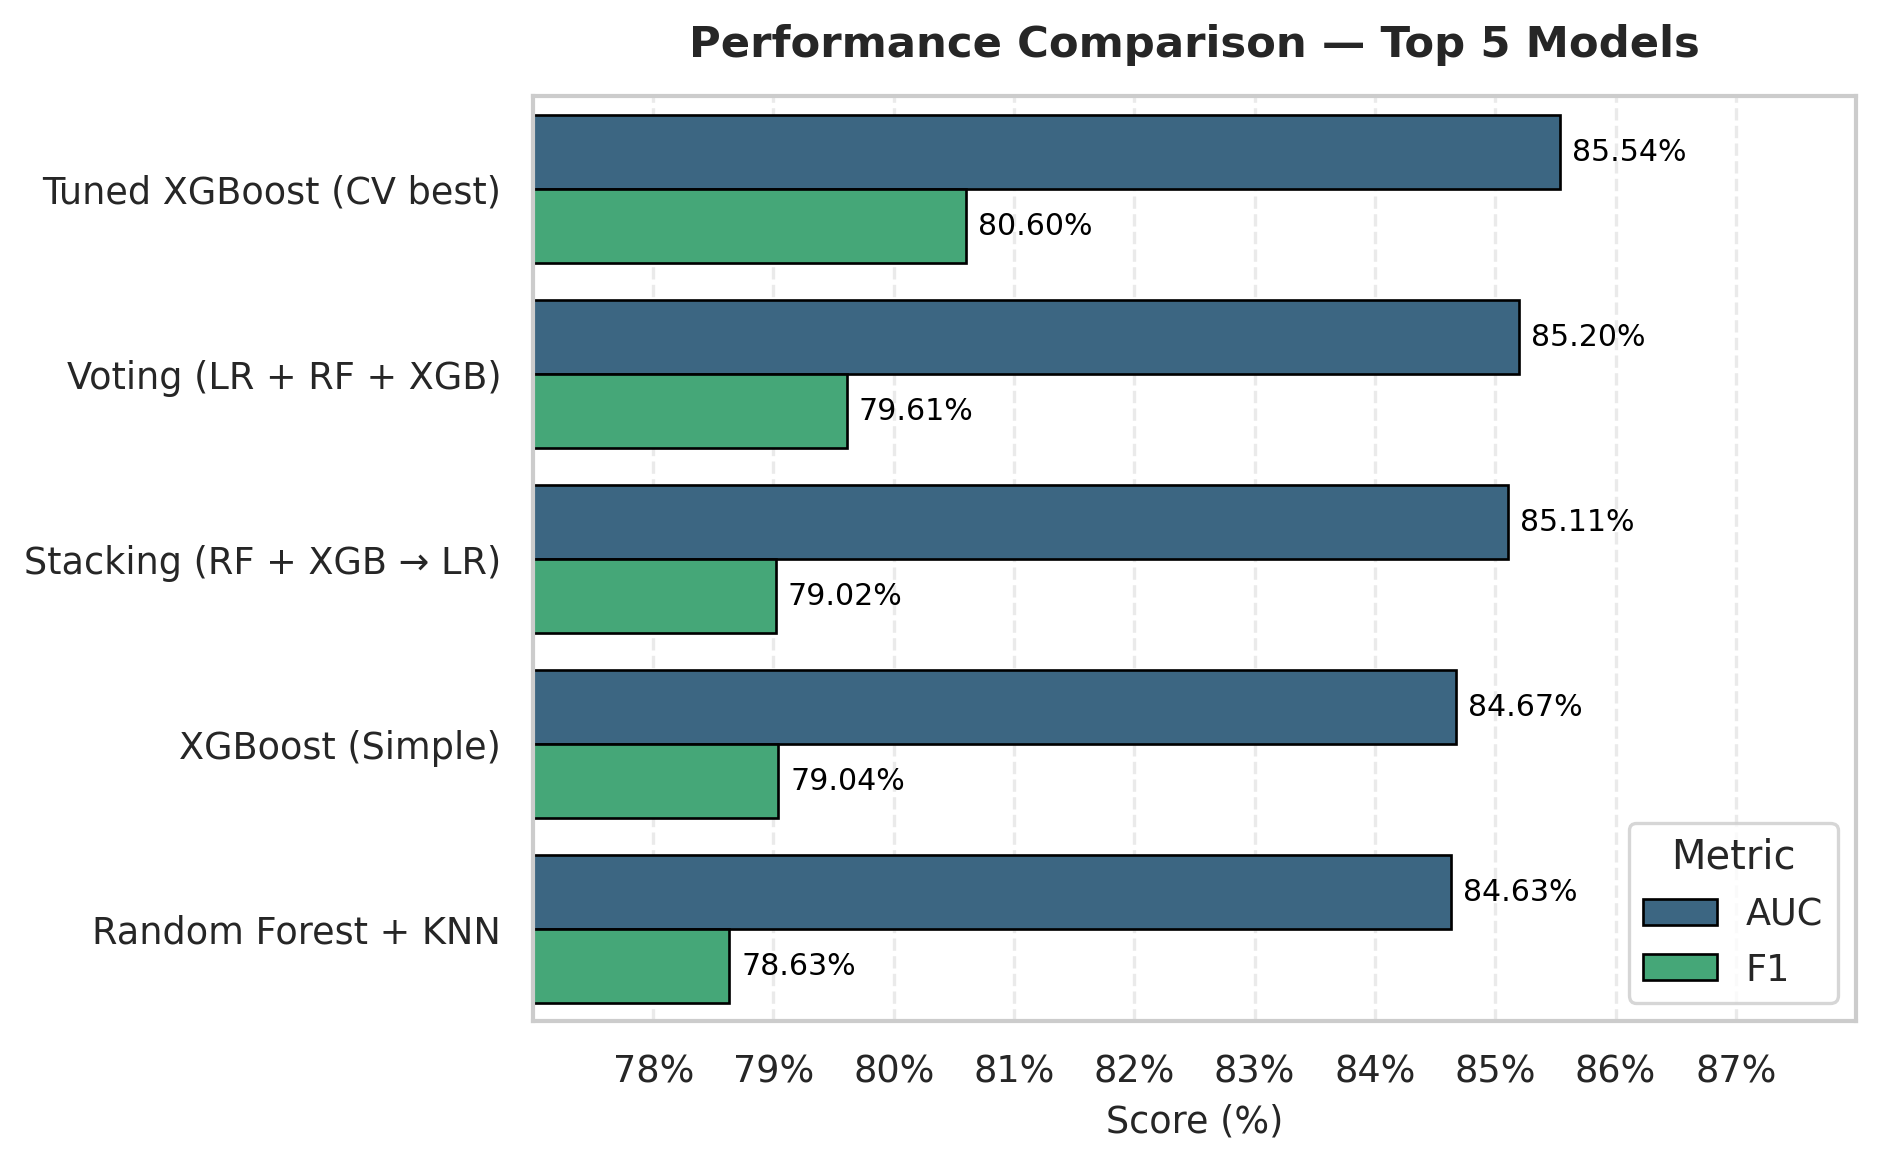

In [ ]:
# -----------------------------------------------
# 📊 Performance Analysis — AUC & F1 Comparison
# Author: Rabia Akhtar | Data Science Challenge 2025
# -----------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create dataframe for top 5 submitted models ---
results = pd.DataFrame({
    "Rank": [1, 2, 3, 4, 5],
    "Model": [
        "Tuned XGBoost (CV best)",
        "Voting (LR + RF + XGB)",
        "Stacking (RF + XGB → LR)",
        "XGBoost (Simple)",
        "Random Forest + KNN"
    ],
    "AUC": [0.8554, 0.8520, 0.8511, 0.8467, 0.8463],
    "F1": [0.8060, 0.7961, 0.7902, 0.7904, 0.7863]
})

# --- Melt for plotting ---
plot_df = results.melt(id_vars="Model", value_vars=["AUC", "F1"],
                       var_name="Metric", value_name="Score")

# --- Plot style ---
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(data=plot_df, x="Score", y="Model", hue="Metric",
                      palette="viridis", edgecolor="black", linewidth=0.8)

# --- Add bar labels ---
for p in barplot.patches:
    score = p.get_width()
    barplot.annotate(f'{score:.2%}',  # Converts to percentage with 2 decimals
                     (score + 0.001, p.get_y() + p.get_height() / 2),
                     va='center', ha='left', fontsize=9, color='black')

# --- Labels & formatting ---
plt.title("Performance Comparison — Top 5 Models", fontsize=13, weight="bold", pad=12)
plt.xlabel("Score (%)", fontsize=11)
plt.ylabel("")
plt.xlim(0.77, 0.88)
plt.xticks(ticks=[i/100 for i in range(78, 88, 1)],
           labels=[f"{i}%" for i in range(78, 88, 1)])
plt.legend(title="Metric", loc="lower right", frameon=True)
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
